### Problem Statement
Surprise Housing,a US-based housing company has decided to enter the Australian market.
The company uses data analytics to purchase houses at a low market value and sell them at a higher price.
For this purpose, the company has collected a data set from the sale of houses in Australia and saved under train.csv.  

The company is looking at such low value properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the properties and decide whether to invest in them or not.

 
### Business Goal 
Model the price of houses with the available independent variables.
This model will be used by Surprise Housing management to understand how exactly the prices vary with the variables.
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
Further, the model will be a good way to understand the pricing dynamics of a new market for management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
Housing = pd.read_csv('train.csv')

In [4]:
Housing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
#change the setting to display all columns in the dataset
#check the data types of the columns

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Housing.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
#drop the columns where all of the data in the columns is NA

Housing = Housing.dropna(axis = 1, how='all')

In [7]:
#remove duplicate data

Housing = Housing.drop_duplicates()

In [8]:
# drop columns not useful for analysis
#Id is just sequence Number , almost all of the values for Utilities & Street are same which is not helpful for analysis

Housing = Housing.drop(['Id','Utilities','Street'], axis = 'columns')

In [9]:
#Check the number ofrows, columns, missing values and percentage of missing values in columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ("Rows     : " ,Housing.shape[0])
    print ("Columns  : " ,Housing.shape[1])
    print ("\nFeatures : \n" ,Housing.columns.tolist())
    print ("\nMissing values :  ", Housing.isnull().sum().sort_values(ascending=False))
    print ("\nMissing values Percentage:  ", round(Housing.isnull().sum()/len(Housing.index),2).sort_values(ascending=False))
    print ("\nUnique values :  \n",Housing.nunique().sort_values(ascending=False))

Rows     :  1460
Columns  :  78

Features : 
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Po

In [10]:
#Drop Columns with missing values greater than 10 % 
#MiscFeature      1406 96%
#Alley            1369 94%
#Fence            1179 81%
#FireplaceQu      690 47%
#LotFrontage      259 18%

Housing =  Housing.drop(["MiscFeature","Alley", "Fence","FireplaceQu","LotFrontage","PoolQC"], axis = 1)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ("\nMissing values :  ", Housing.isnull().sum().sort_values(ascending=False))


Missing values :   GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtQual         37
BsmtCond         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Fireplaces        0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
Functional        0
BsmtFullBath      0
TotRmsAbvGrd      0
MSSubClass        0
LowQualFinSF      0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
GrLivArea         0
CentralAir        0
2ndFlrSF          0
YearRemodAdd      0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0


### Impute Missing Values

In [12]:
#GarageYrBlt        81
#GarageCond         81
#GarageType         81
#GarageFinish       81
#GarageQual         81
#BsmtFinType2       38
#BsmtExposure       38
#BsmtQual           37
#BsmtCond           37
#BsmtFinType1       37
#MasVnrArea          8
#MasVnrType          8
#Electrical          1

In [13]:
#Exterior2nd: Exterior covering on house (if more than one material)

#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['Exterior2nd'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['Exterior2nd'].describe())

counts VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

 describe count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object


In [14]:
#imputing missing values with most common value of the column
Housing['Exterior2nd'].fillna('VinylSd', inplace = True)
print(Housing['Exterior2nd'].unique())

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [15]:
#SaleCondition: Condition of sale

#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['SaleCondition'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['SaleCondition'].describe())

counts Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

 describe count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object


In [16]:
#imputing missing values with most common value of the column
Housing['SaleCondition'].fillna('Normal', inplace = True)
print(Housing['SaleCondition'].unique())

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [17]:
#GarageYrBlt: Year garage was built

#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['GarageYrBlt'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['GarageYrBlt'].describe())

counts 2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1957.0    20
2001.0    20
1996.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1964.0    18
1994.0    18
1995.0    18
1974.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1979.0    15
1969.0    15
1967.0    15
1980.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1971.0    13
1955.0    13
1961.0    13
1992.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1949.0     8
1984.0     8
1930.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1931.0     4
1945.0     4
1982.0     4
1928.0     4
1946.0     4
1935.0     4
1910.

In [18]:
#imputing missing values with median value of the column
Housing['GarageYrBlt'].fillna(Housing['GarageYrBlt'].median(), inplace = True)

In [19]:
#check the impact of imputation on mean, median & other metrics
Housing['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [20]:
#Change the datatype to int
print ('Data type of GarageYrBlt:', Housing['GarageYrBlt'].dtype)
Housing['GarageYrBlt']= Housing['GarageYrBlt'].astype('int64')
print ('Data type of GarageYrBlt:', Housing['GarageYrBlt'].dtype)

Data type of GarageYrBlt: float64
Data type of GarageYrBlt: int64


In [21]:
#GarageCond: Garage condition

#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['GarageCond'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['GarageCond'].describe())

counts TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

 describe count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object


In [22]:
#imputing missing values with most frequent value
Housing['GarageYrBlt'].fillna('TA', inplace = True)

In [23]:
#GarageType: Garage location

       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage
    
#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['GarageType'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['GarageType'].describe())    

counts Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

 describe count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


In [24]:
#imputing missing values with most frequent value
Housing['GarageType'].fillna('Attchd', inplace = True)

In [25]:
#GarageFinish: Interior finish of the garage

       #Fin	Finished
       #RFn	Rough Finished	
       #Unf	Unfinished
       #NA	No Garage
        
#Analyse how the missing values should be imputed
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['GarageFinish'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['GarageFinish'].describe()) 

counts Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

 describe count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object


In [26]:
#imputing missing values with most frequent value
Housing['GarageFinish'].fillna('Unf', inplace = True)

In [27]:
#GarageQual: Garage quality

       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
        
#Analyse how the missing values should be imputed
print("counts",Housing['GarageQual'].value_counts().sort_values(ascending=False))
print("\n describe",Housing['GarageQual'].describe()) 

counts TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

 describe count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object


In [28]:
#imputing missing values with most frequent value
Housing['GarageQual'].fillna('TA', inplace = True)

In [29]:
#BsmtFinType1: Rating of basement finished area

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
    

print("counts",Housing['BsmtFinType1'].value_counts().sort_values(ascending=False))
print("\n describe",Housing['BsmtFinType1'].describe()) 

counts Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

 describe count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


In [30]:
#imputing missing values with most frequent value
Housing['BsmtFinType1'].fillna('Unf', inplace = True)

In [31]:
#BsmtFinType2: BsmtFinType2: Rating of basement finished area (if multiple types)

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
    
print("counts",Housing['BsmtFinType2'].value_counts().sort_values(ascending=False))
print("\n describe",Housing['BsmtFinType2'].describe()) 

counts Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

 describe count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object


In [32]:
#imputing missing values with most frequent value
Housing['BsmtFinType2'].fillna('Unf', inplace = True)

In [33]:
#BsmtExposure: Refers to walkout or garden level walls

       #Gd	Good Exposure
       #Av	Average Exposure (split levels or foyers typically score average or above)	
       #Mn	Mimimum Exposure
       #No	No Exposure
       #NA	No Basement
    
print("counts",Housing['BsmtExposure'].value_counts().sort_values(ascending=False))
print("\n describe",Housing['BsmtExposure'].describe()) 

counts No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

 describe count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object


In [34]:
#imputing missing values with most frequent value
Housing['BsmtExposure'].fillna('No', inplace = True)

In [35]:
#BsmtQual: Evaluates the height of the basement

       #Ex	Excellent (100+ inches)	
       #Gd	Good (90-99 inches)
       #TA	Typical (80-89 inches)
       #Fa	Fair (70-79 inches)
       #Po	Poor (<70 inches
       #NA	No Basement
        
print("Value Counts: \n", Housing['BsmtQual'].value_counts().sort_values(ascending=False))
print("\n Describe: \n", Housing['BsmtQual'].describe()) 

Value Counts: 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

 Describe: 
 count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object


In [36]:
#imputing missing values with most frequent value
Housing['BsmtQual'].fillna('TA', inplace = True)

In [37]:
#BsmtCond: Evaluates the general condition of the basement

       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NA	No Basement
        
print("Value Counts: \n", Housing['BsmtCond'].value_counts().sort_values(ascending=False))
print("\n Describe: \n", Housing['BsmtCond'].describe()) 

Value Counts: 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

 Describe: 
 count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object


In [38]:
#imputing missing values with most frequent value
Housing['BsmtCond'].fillna('TA', inplace = True)

In [39]:
#MasVnrArea: Masonry veneer area in square feet

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("counts",Housing['MasVnrArea'].value_counts().sort_values(ascending=False))
    print("\n describe",Housing['MasVnrArea'].describe())

counts 0.0       861
72.0        8
108.0       8
180.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
84.0        5
170.0       5
360.0       5
320.0       5
132.0       5
270.0       4
456.0       4
246.0       4
178.0       4
160.0       4
216.0       4
288.0       4
76.0        4
210.0       4
100.0       4
40.0        4
268.0       4
300.0       4
196.0       4
252.0       4
183.0       4
336.0       4
220.0       4
168.0       4
136.0       3
176.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
240.0       3
174.0       3
208.0       3
312.0       3
169.0       3
82.0        3
186.0       3
420.0       3
85.0        3
116.0       3
74.0        3
70.0        3
50.0        3
44.0        3
226.0       3
104.0       3
272.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
442.0       2
260.0       2
153.0       2
203.0       2
66.0        2
472.0       2
344.0       2

In [40]:
#imputing missing values with median is 0
Housing['MasVnrArea'].fillna(Housing['MasVnrArea'].median(), inplace = True)

In [41]:
#check the impact of imputation on mean, median & other metrics
Housing['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [42]:
#MasVnrType: Masonry veneer type

       #BrkCmn	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #None	None
       #Stone	Stone
    
print("Value Counts: \n", Housing['MasVnrType'].value_counts().sort_values(ascending=False))
print("\n Describe: \n", Housing['MasVnrType'].describe()) 

Value Counts: 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

 Describe: 
 count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object


In [43]:
#imputing missing values with most frequent value
Housing['MasVnrType'].fillna('None', inplace = True)

In [44]:
#Electrical: Electrical system

       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed
    
print("Value Counts: \n", Housing['Electrical'].value_counts().sort_values(ascending=False))
print("\n Describe: \n", Housing['Electrical'].describe()) 

Value Counts: 
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

 Describe: 
 count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [45]:
#imputing missing values with most frequent value

Housing['Electrical'].fillna('SBrkr', inplace = True)

In [46]:
print("Value Counts: \n", Housing['GarageCond'].value_counts().sort_values(ascending=False))
print("\n Describe: \n", Housing['GarageCond'].describe()) 

Value Counts: 
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

 Describe: 
 count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object


In [47]:
#imputing missing values with most frequent value

Housing['GarageCond'].fillna('TA', inplace = True)

In [48]:
#check for NaN values

Housing.columns[Housing.isna().any()].tolist()

[]

In [49]:
#drop the rows where all of the data is NA

Housing = Housing.dropna()

In [50]:
Housing.shape

(1460, 72)

### Exploratory Data Analysis

In [51]:
#Get all categorical Columns

categorical_columns = Housing.select_dtypes(include = object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',Housing[col].unique())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle  :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl  :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFa

In [52]:
#univariate Analysis for numeric columns

def NumericColumnPlots(DataFrame, NumericColumn ):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
    ax[0].set_title("Scatter Plot")
    sns.scatterplot(data =DataFrame[NumericColumn],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =DataFrame[[NumericColumn]],orient='v',ax=ax[1])
    ax[2].set_title("Distribution Plot")
    sns.distplot(DataFrame[NumericColumn],hist=True ,ax=ax[2] )
    plt.show()
    print(DataFrame[NumericColumn].describe())

In [53]:
#Get all numerical Columns
numerical_columns = Housing.select_dtypes(include = np.number).columns.tolist()

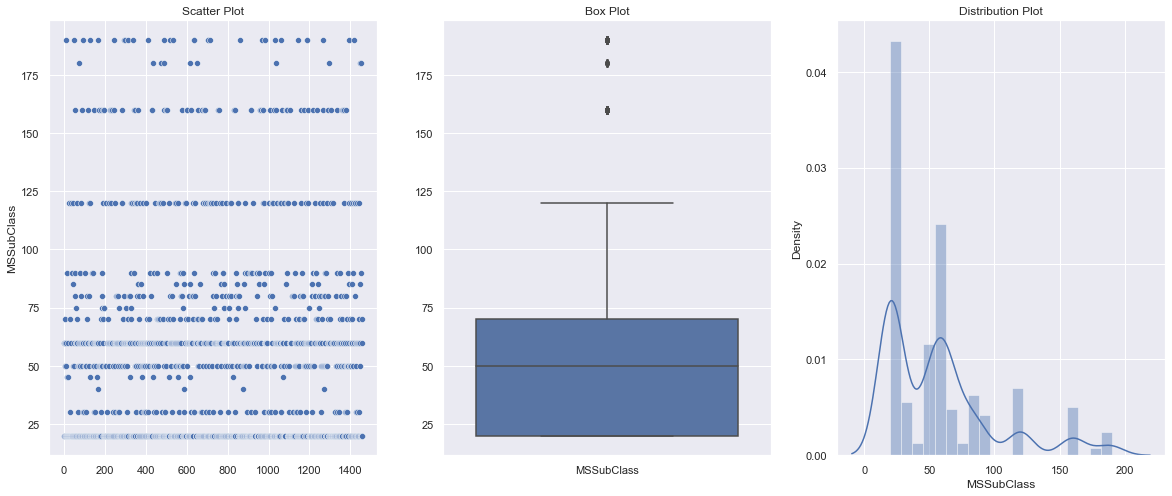

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


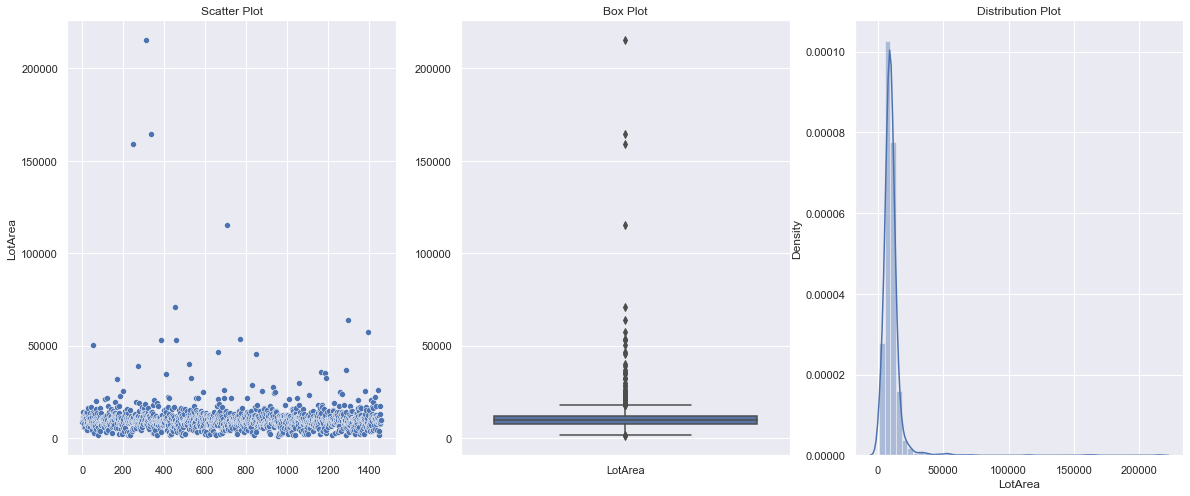

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


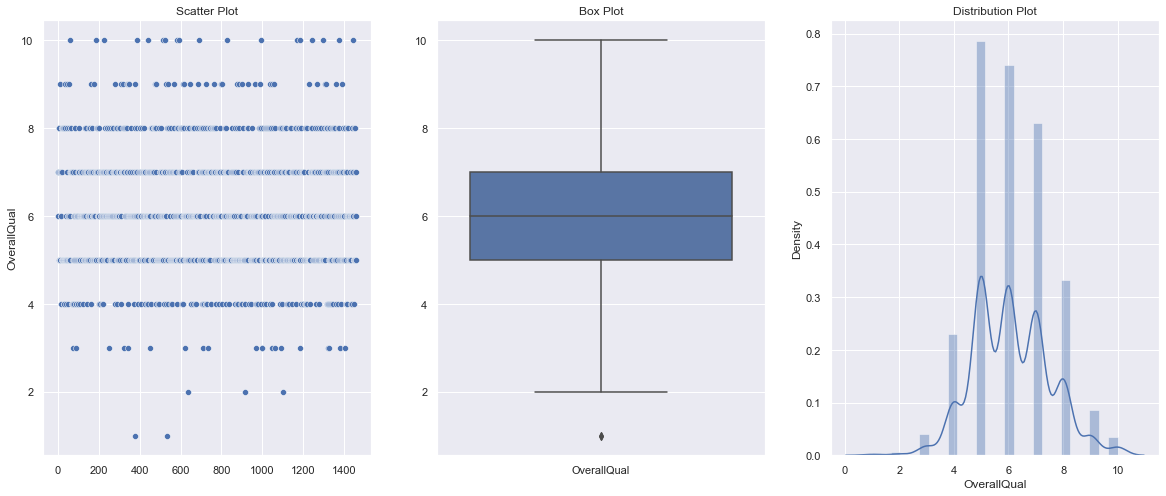

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


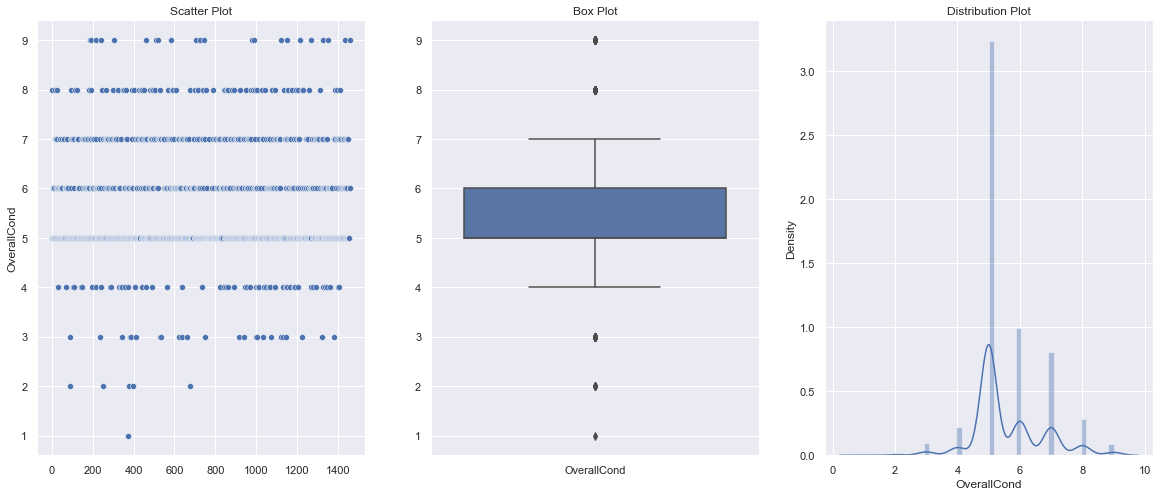

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


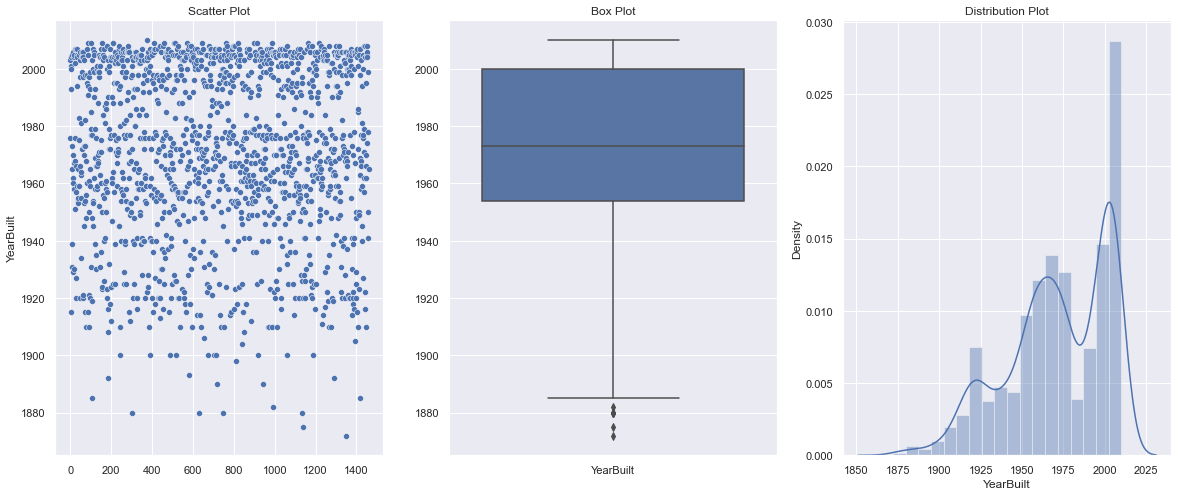

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


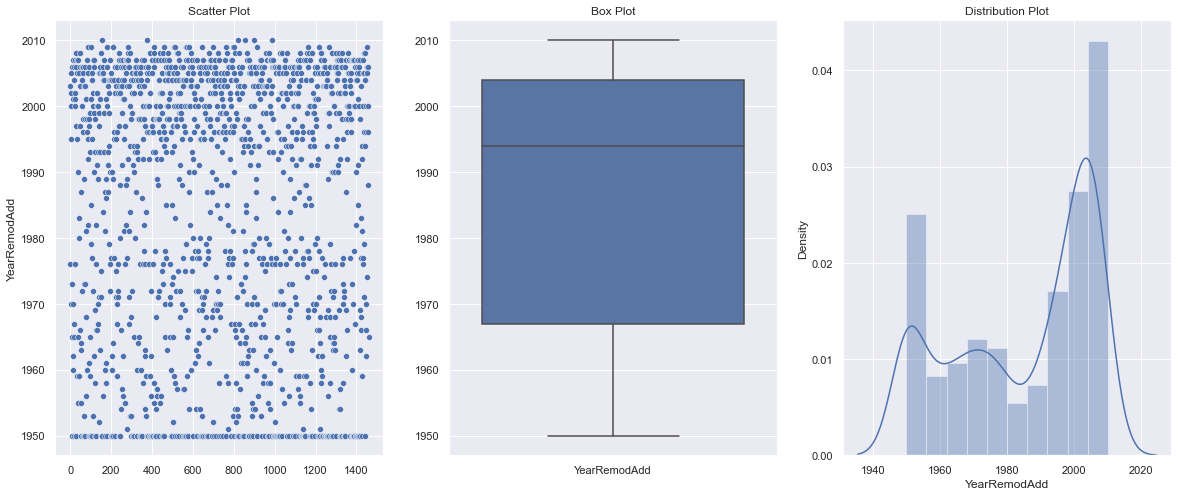

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


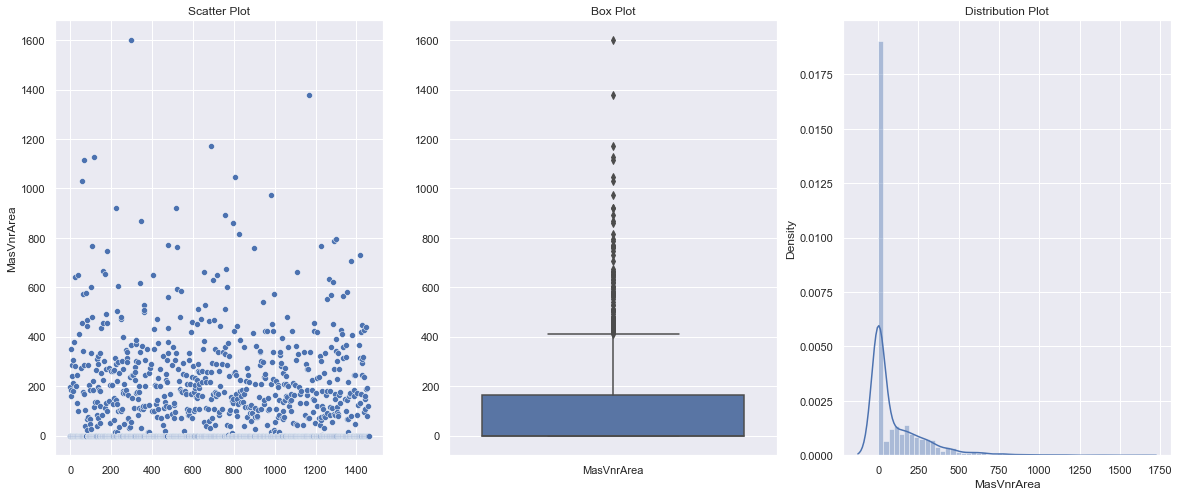

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


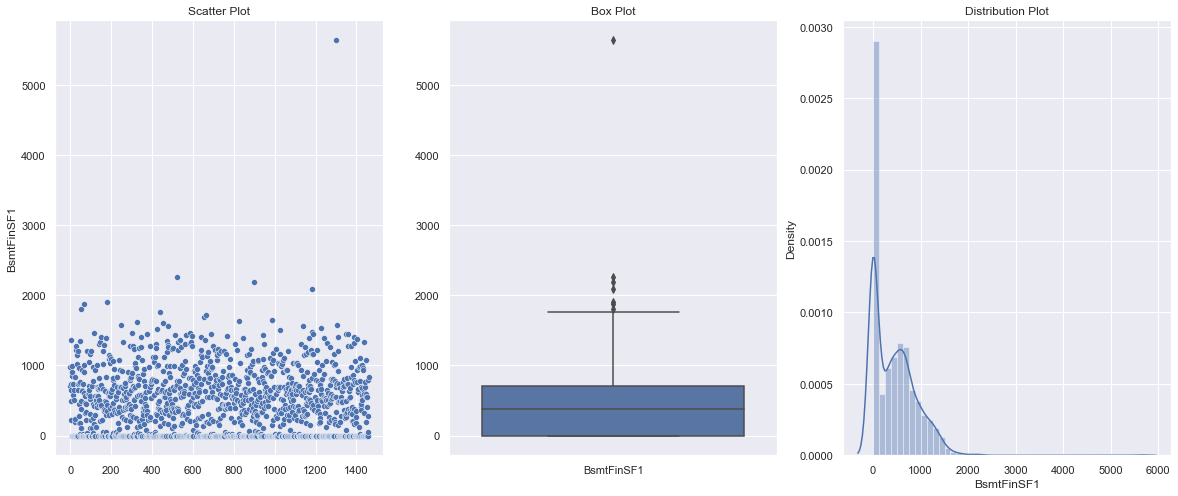

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


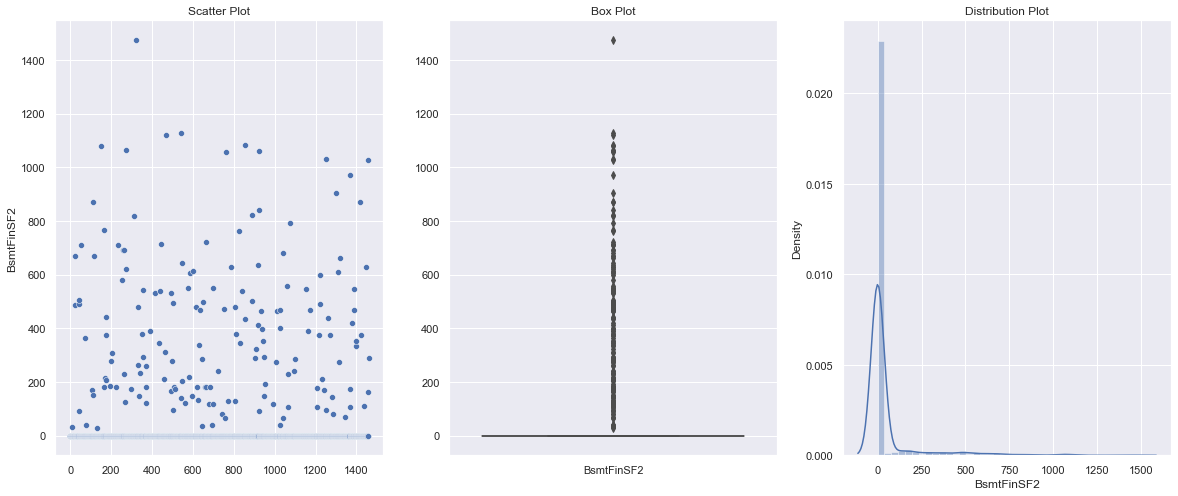

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


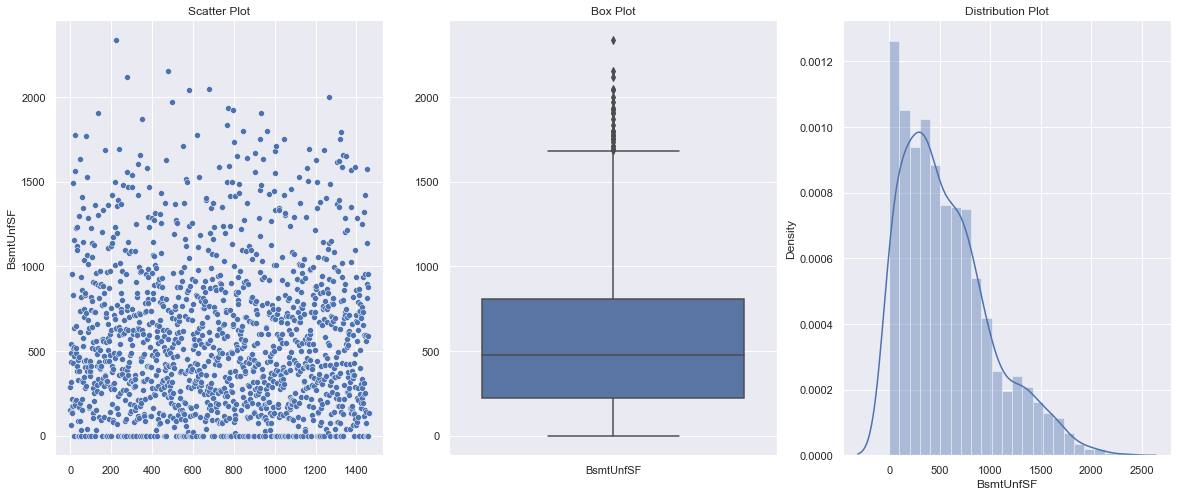

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


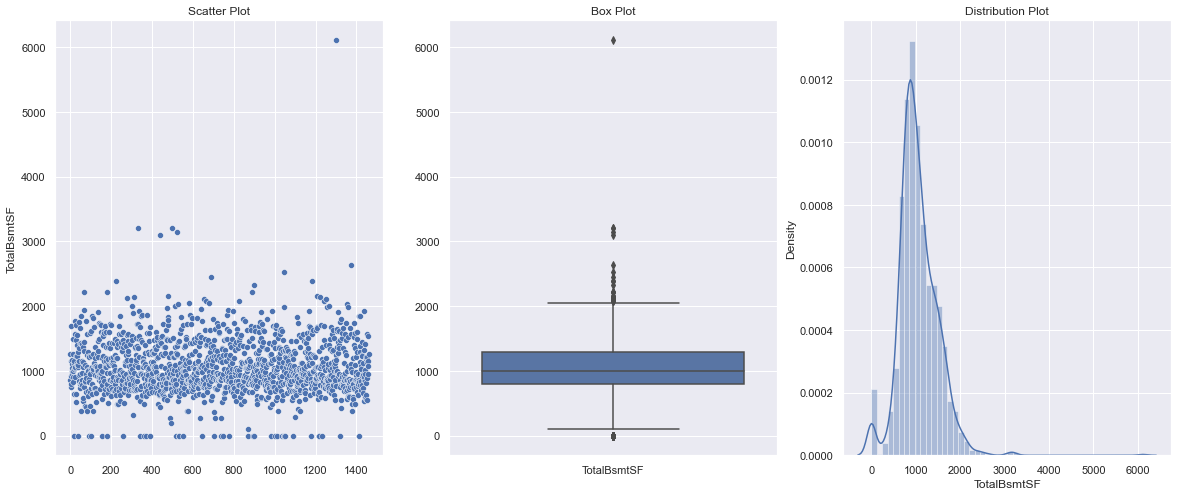

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


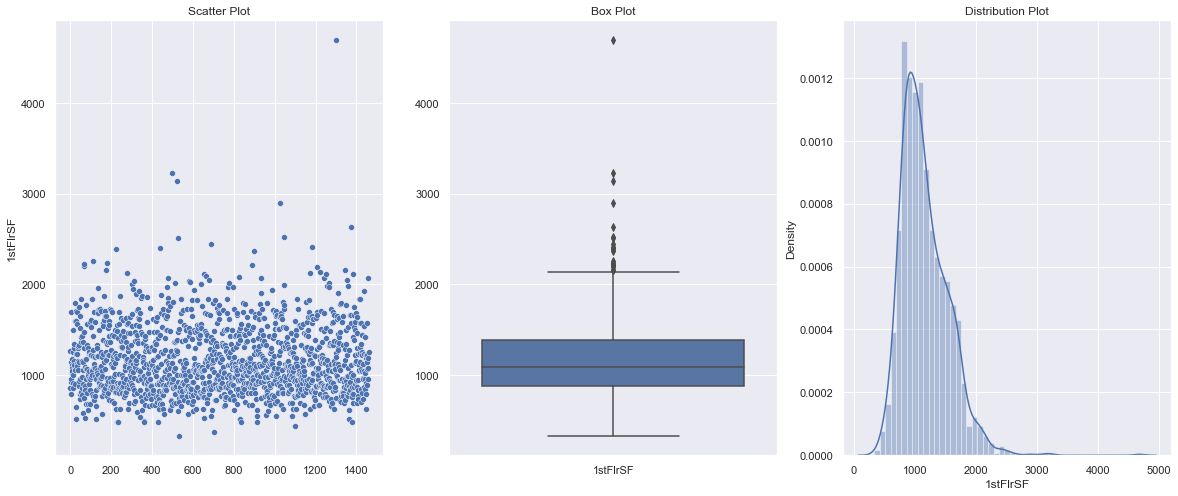

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


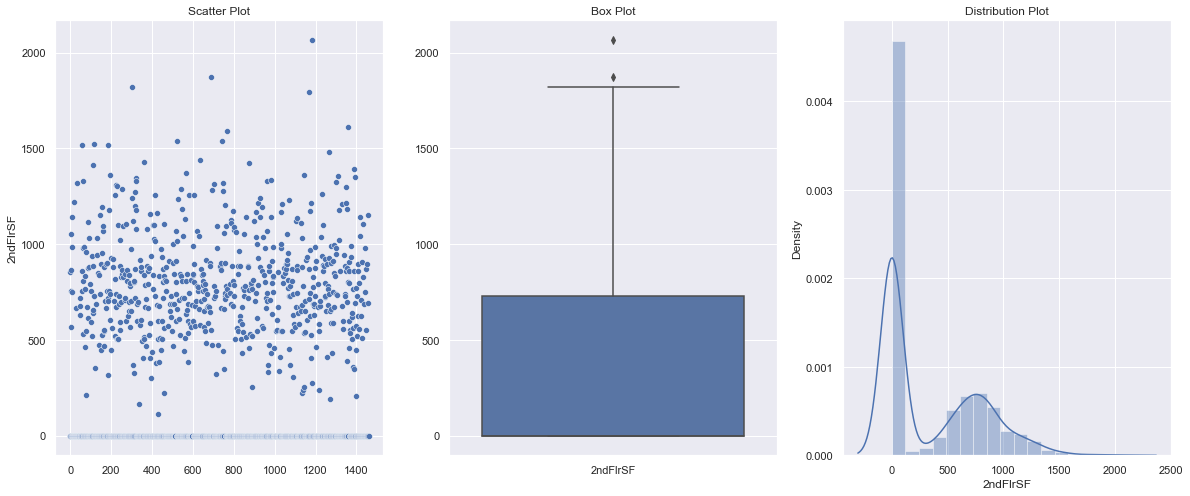

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


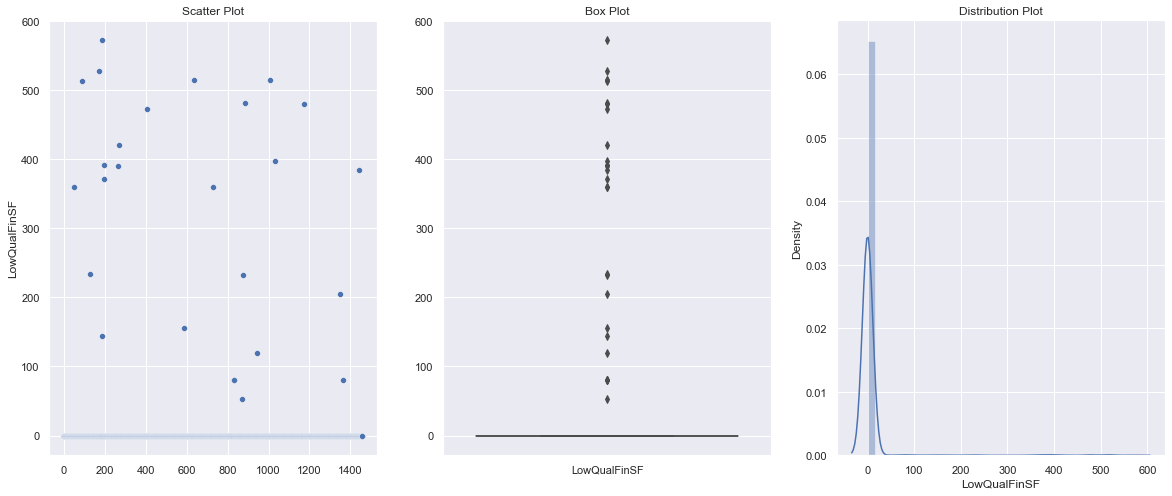

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


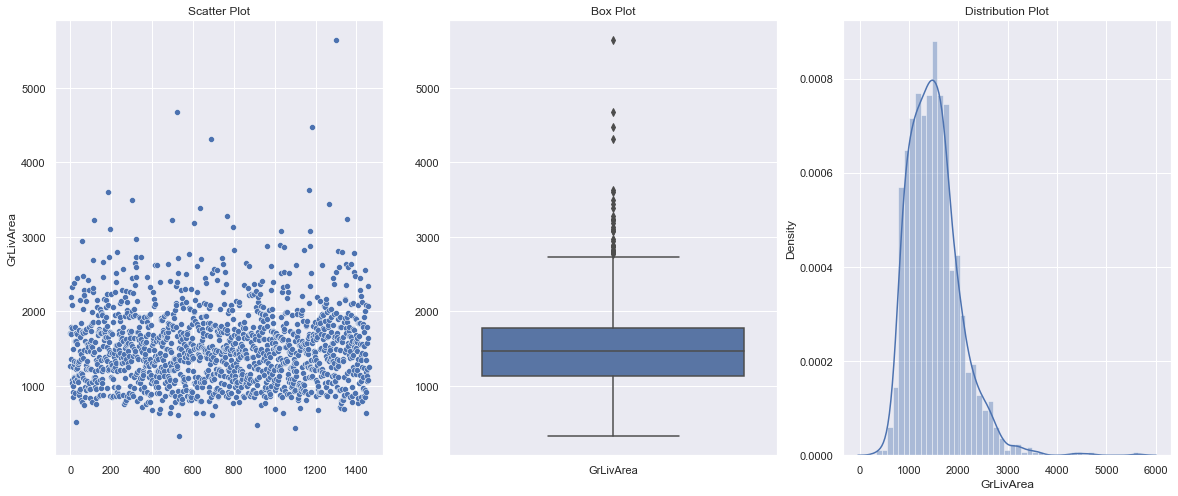

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


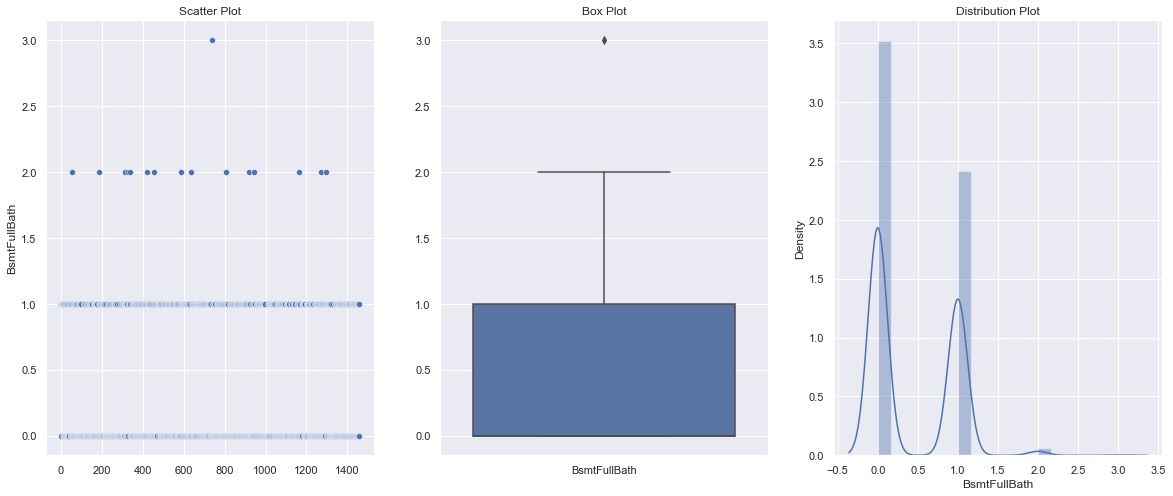

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


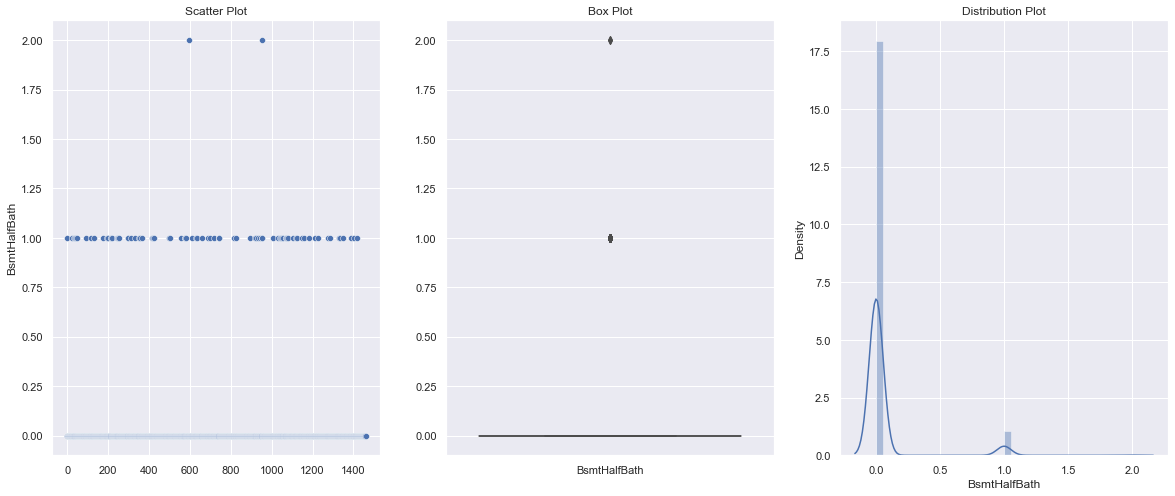

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


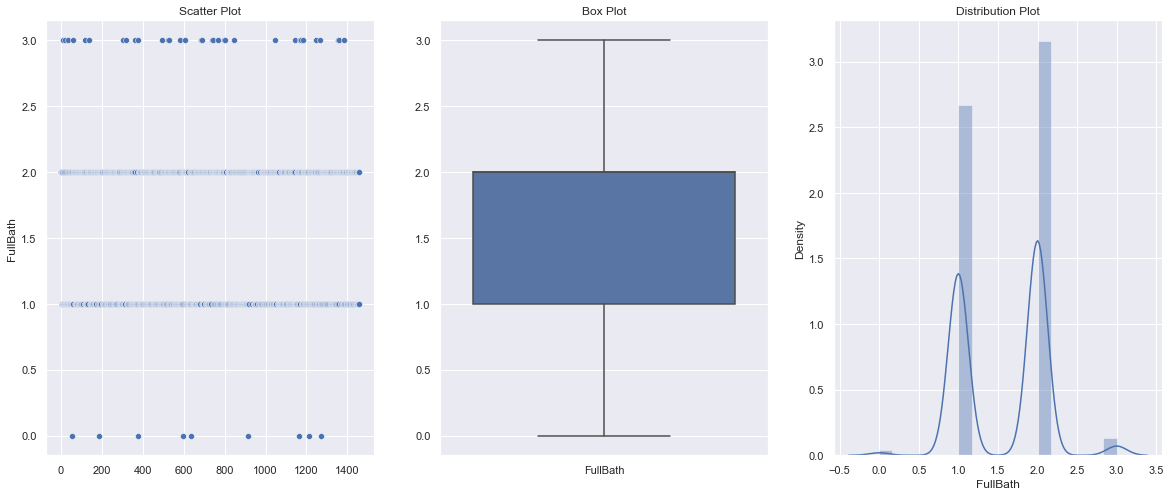

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


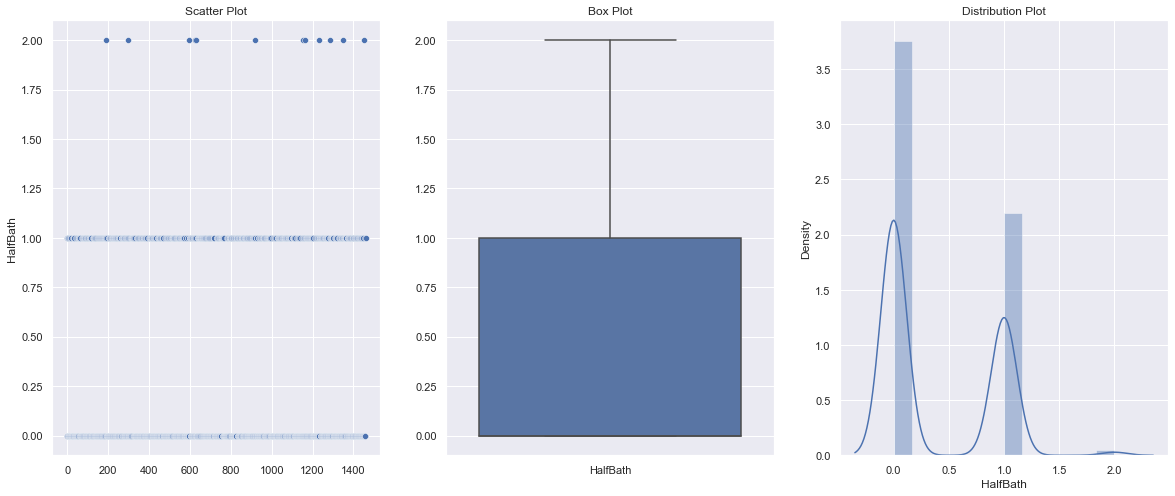

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


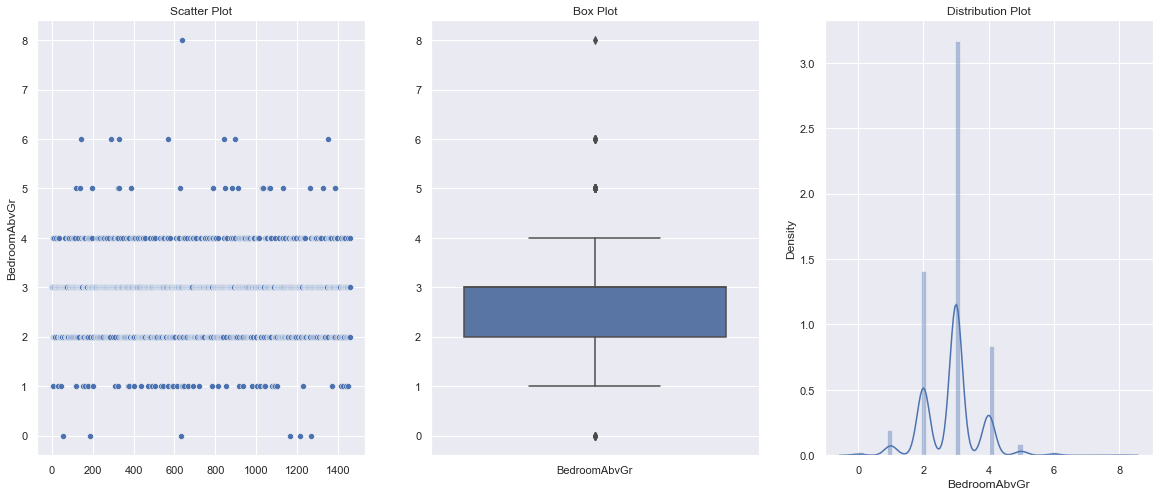

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


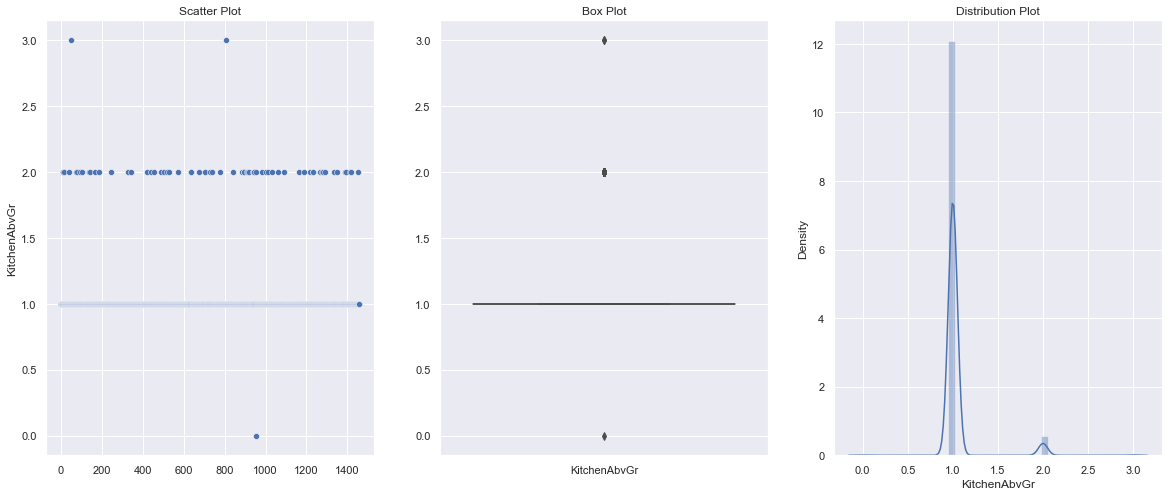

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


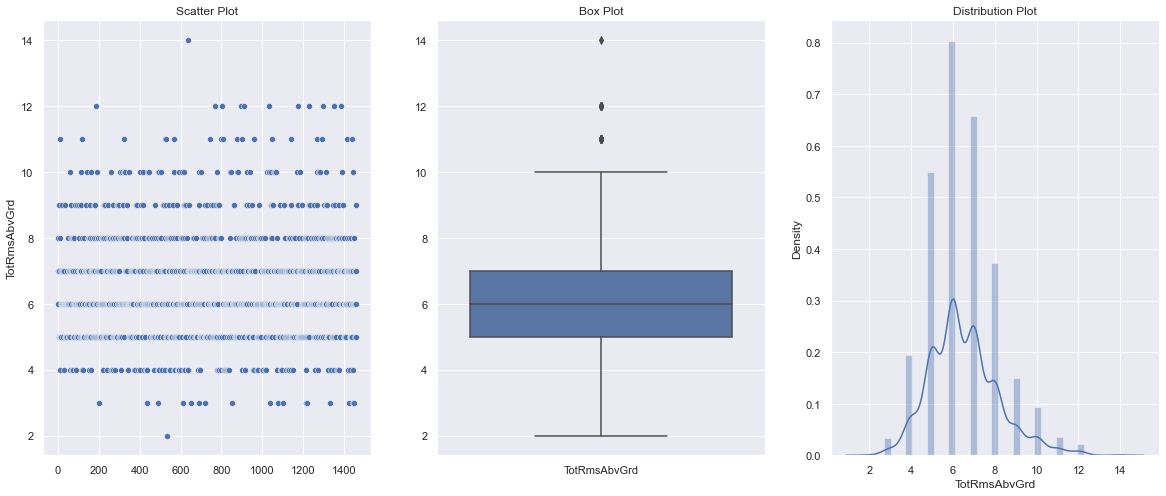

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


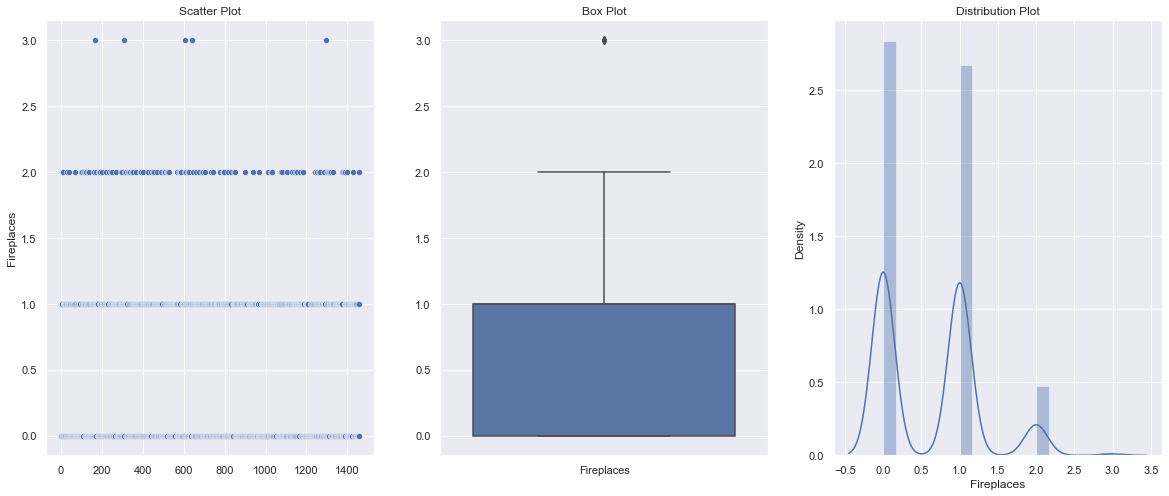

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


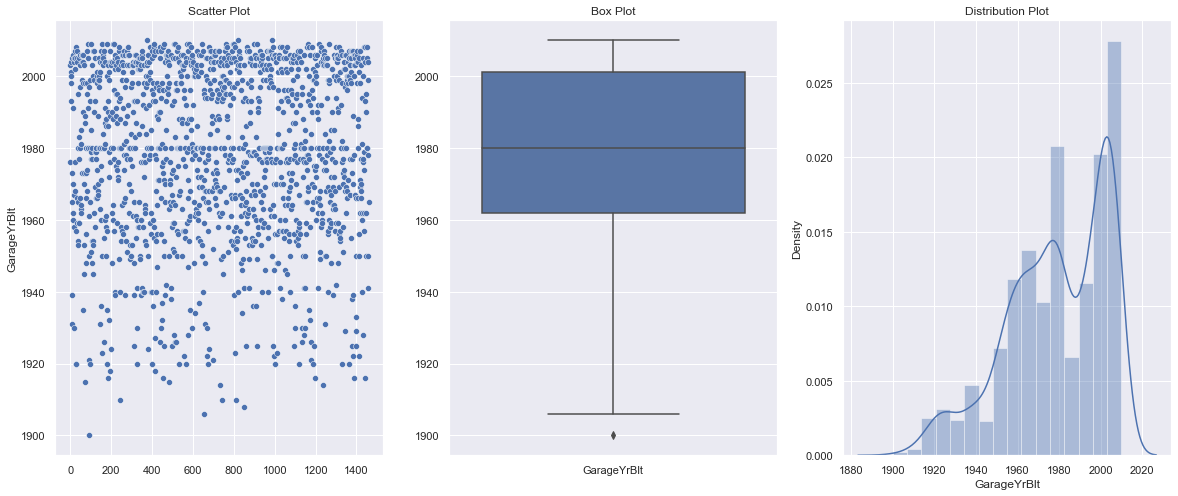

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


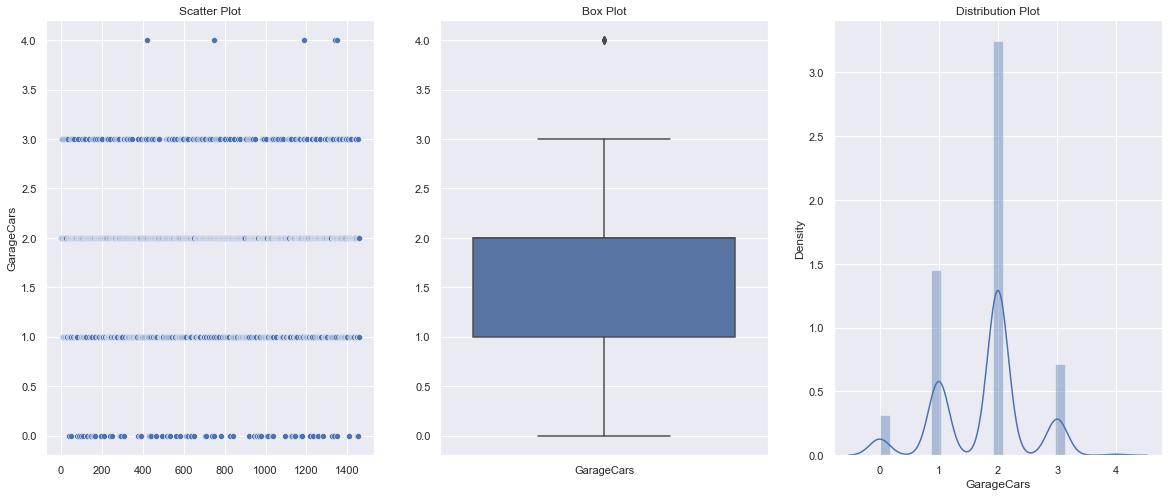

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


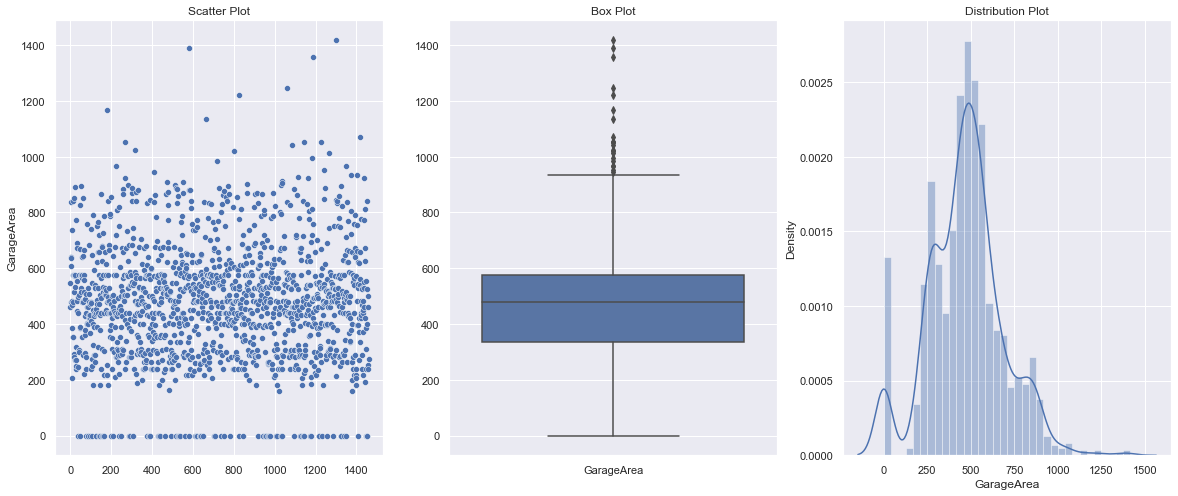

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


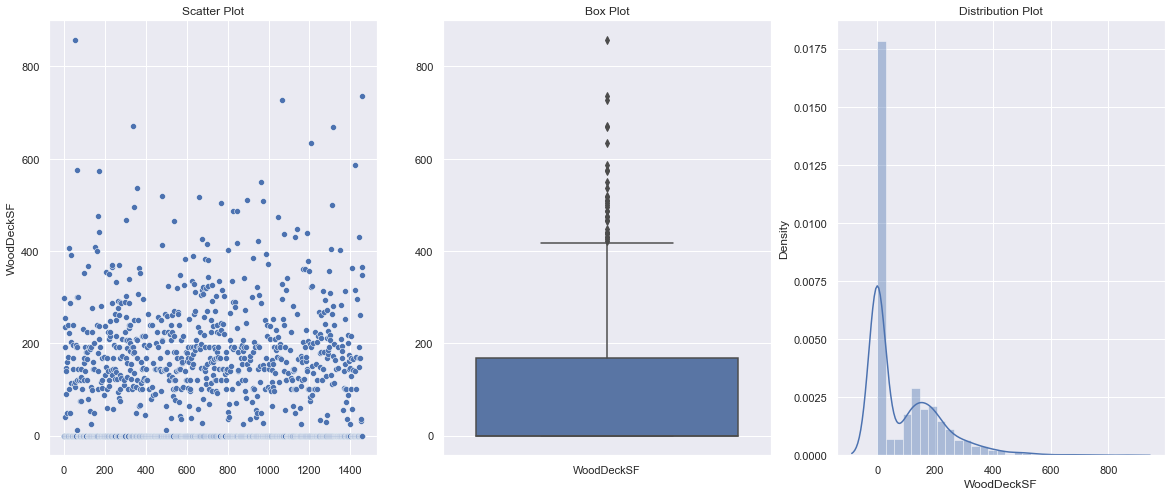

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


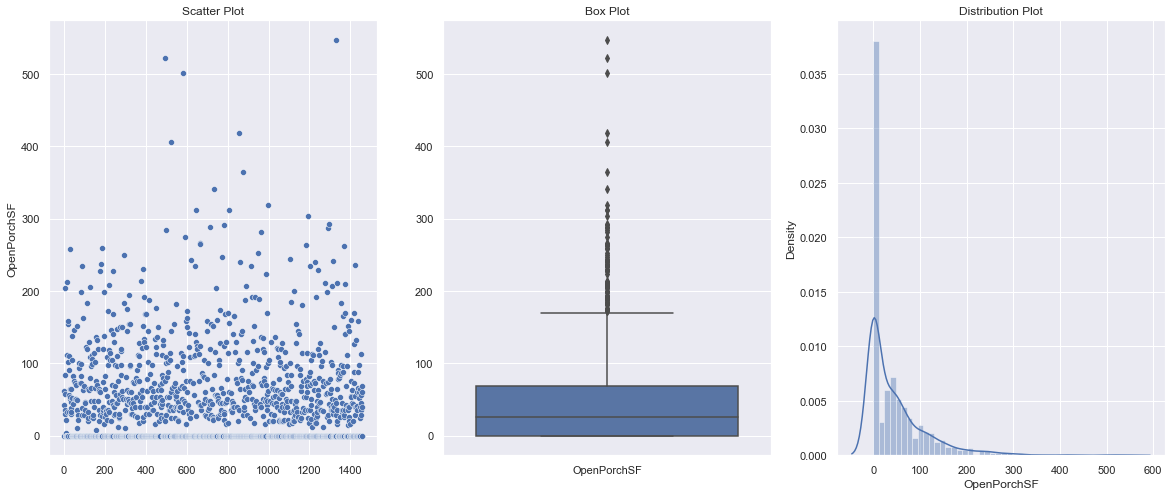

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


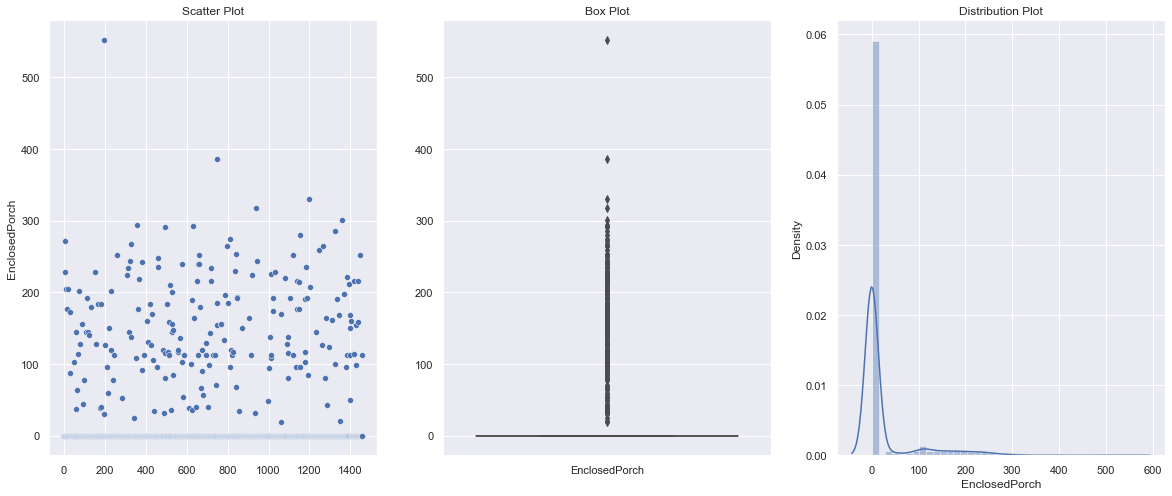

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


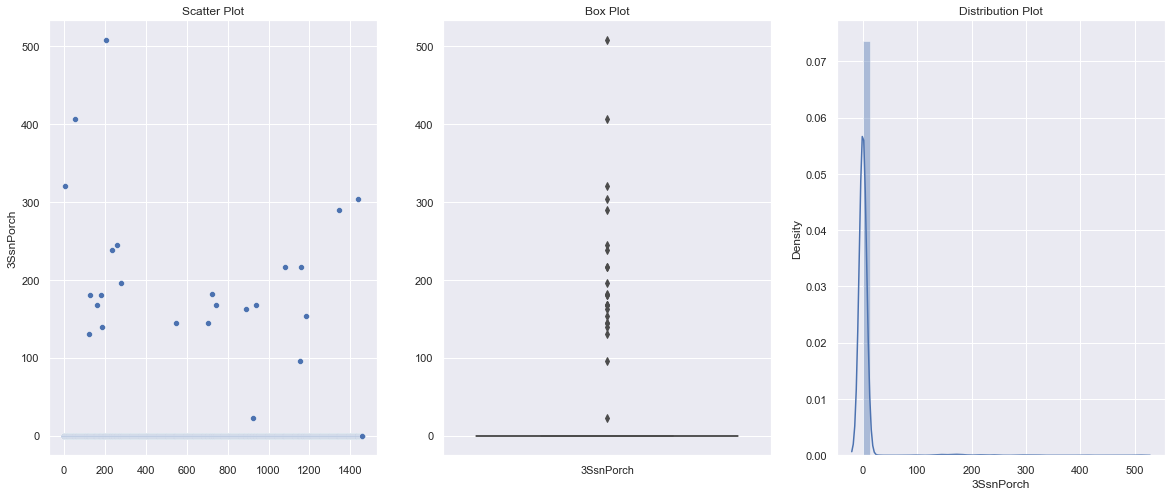

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


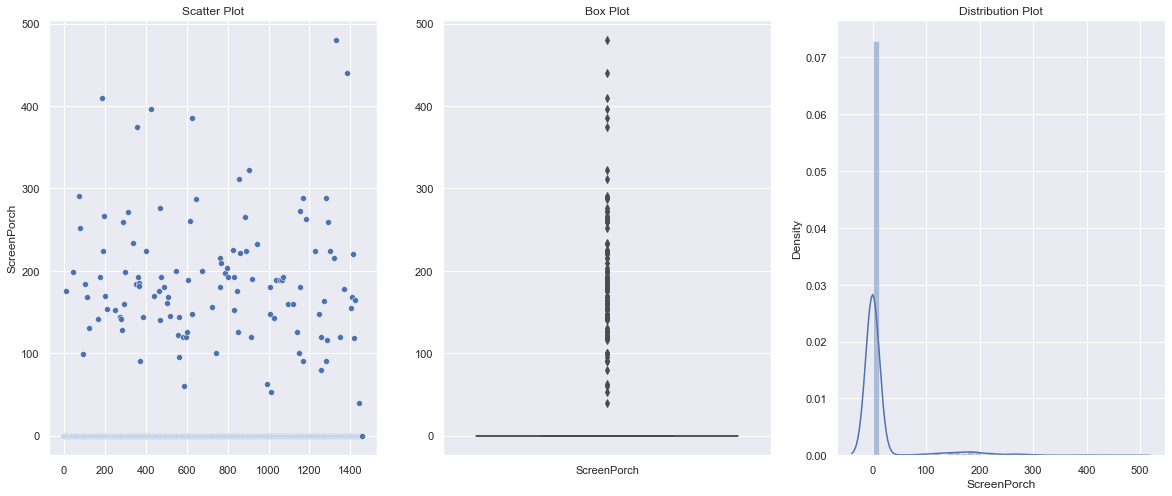

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


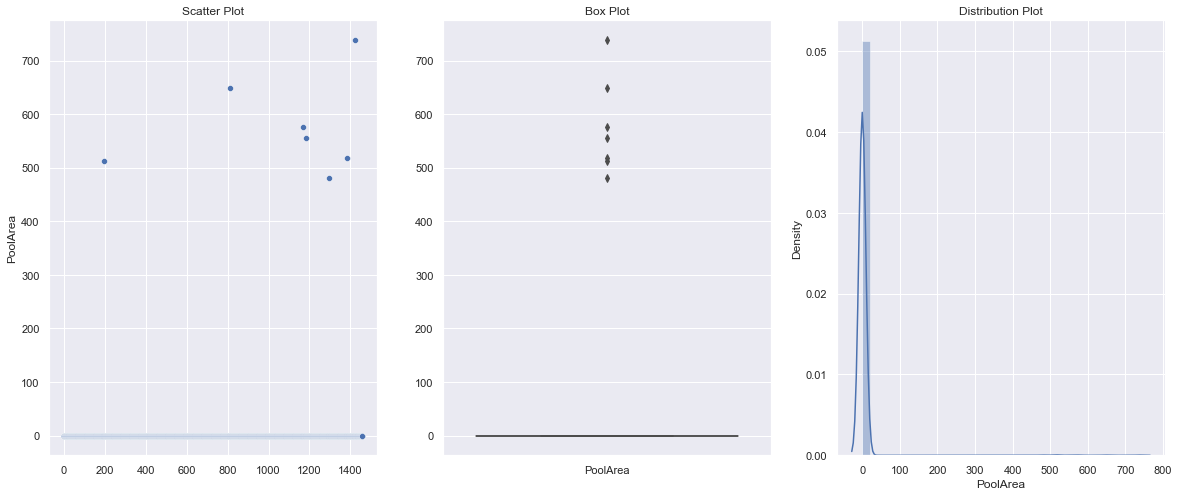

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


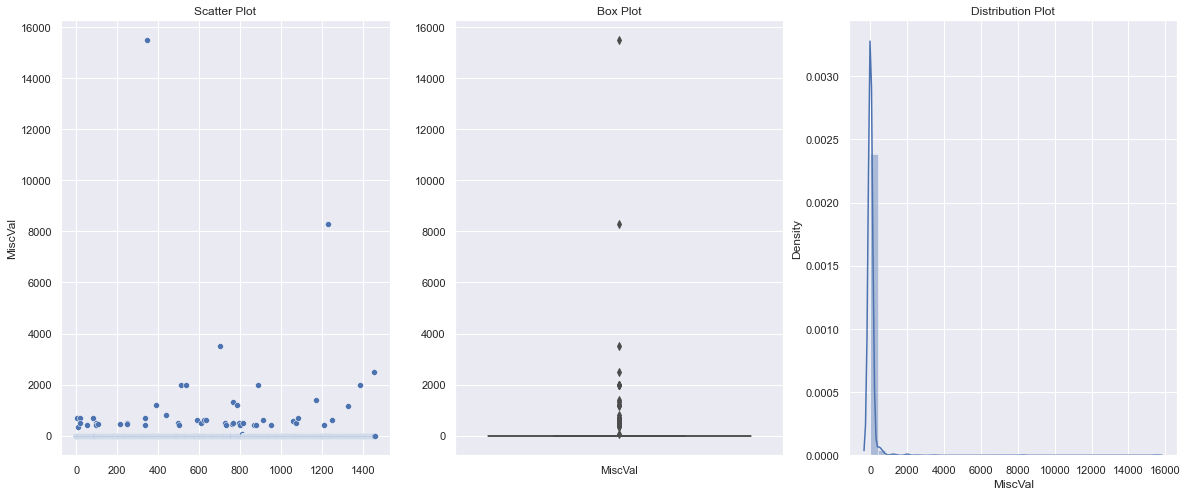

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


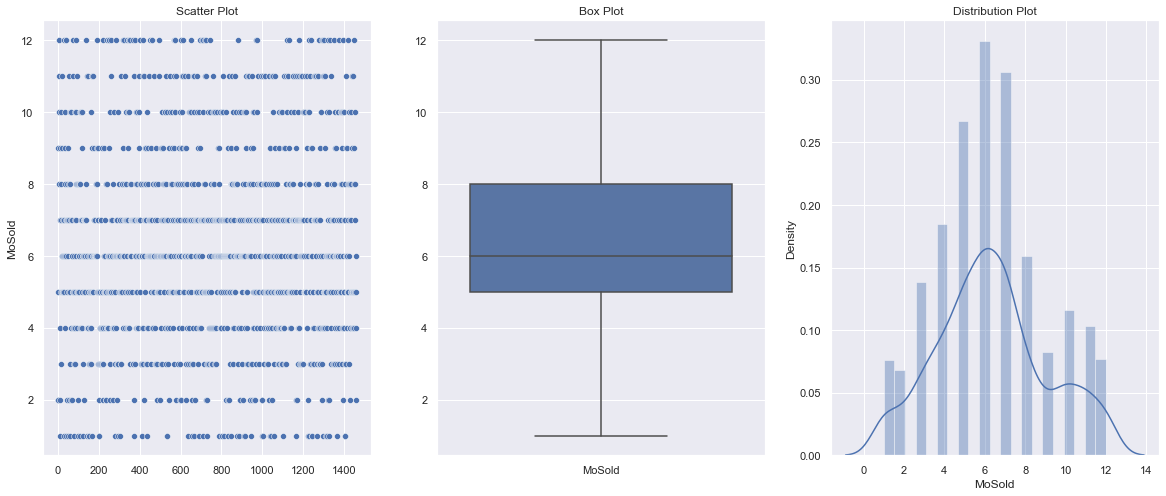

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


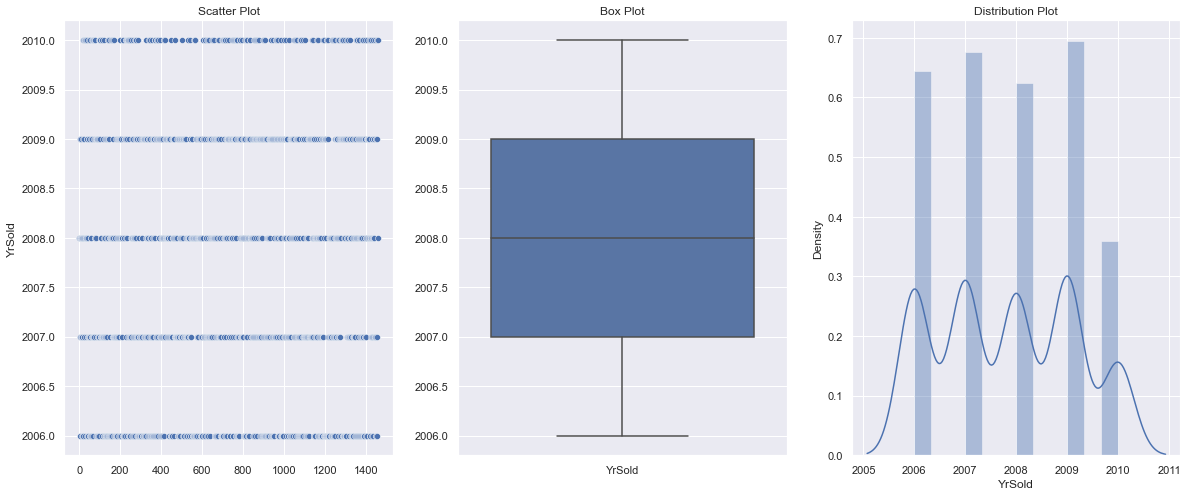

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


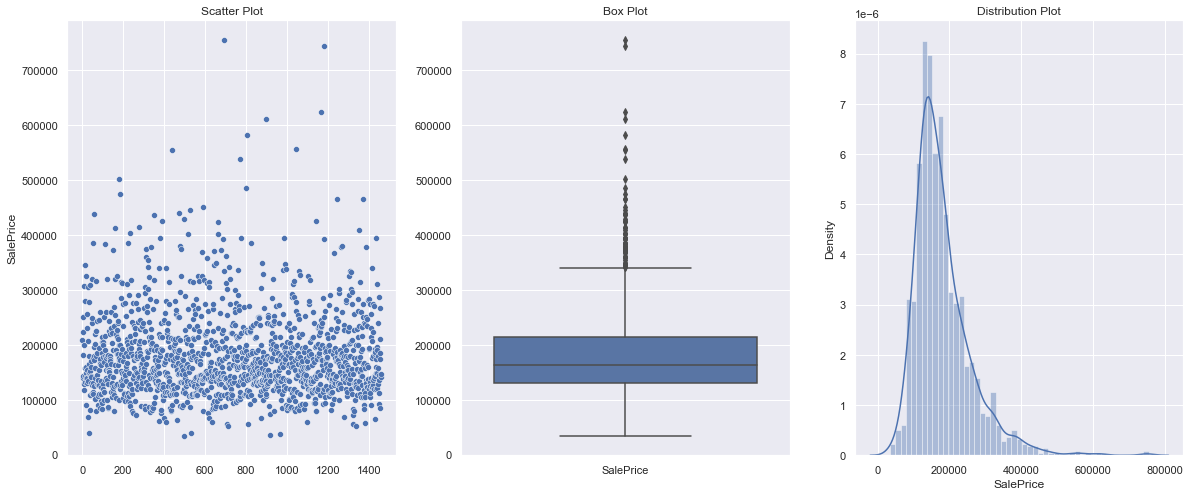

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [54]:
#Ploting the graph for all numerical variables
for index, col in enumerate(numerical_columns):
    NumericColumnPlots(Housing, col)

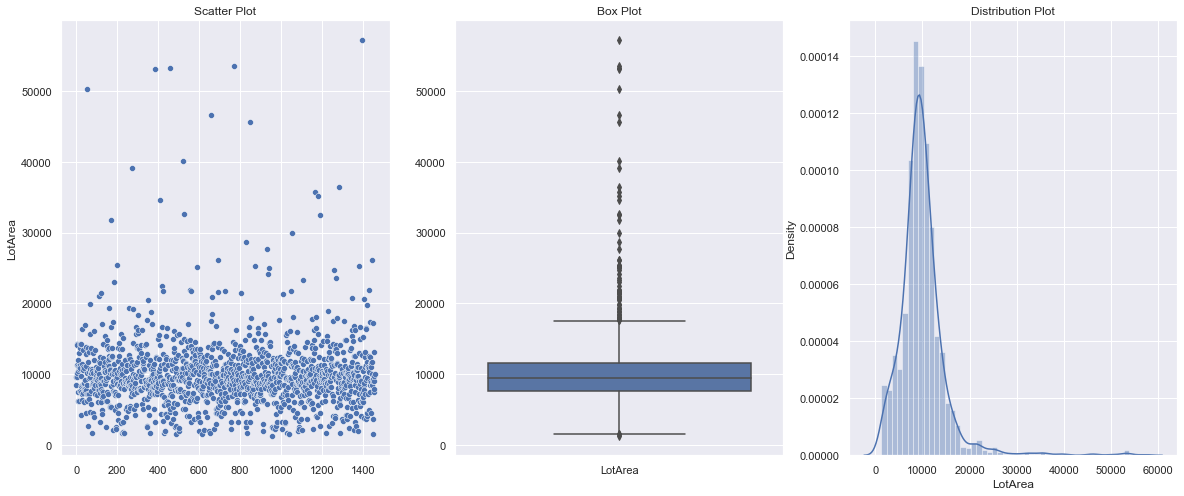

count     1454.000000
mean     10017.790234
std       5236.663288
min       1300.000000
25%       7536.250000
50%       9458.500000
75%      11546.250000
max      57200.000000
Name: LotArea, dtype: float64


In [55]:
#Remove Outliers
Housing = Housing[Housing["LotArea"] < Housing['LotArea'].quantile(0.996) ]
NumericColumnPlots(Housing, 'LotArea')

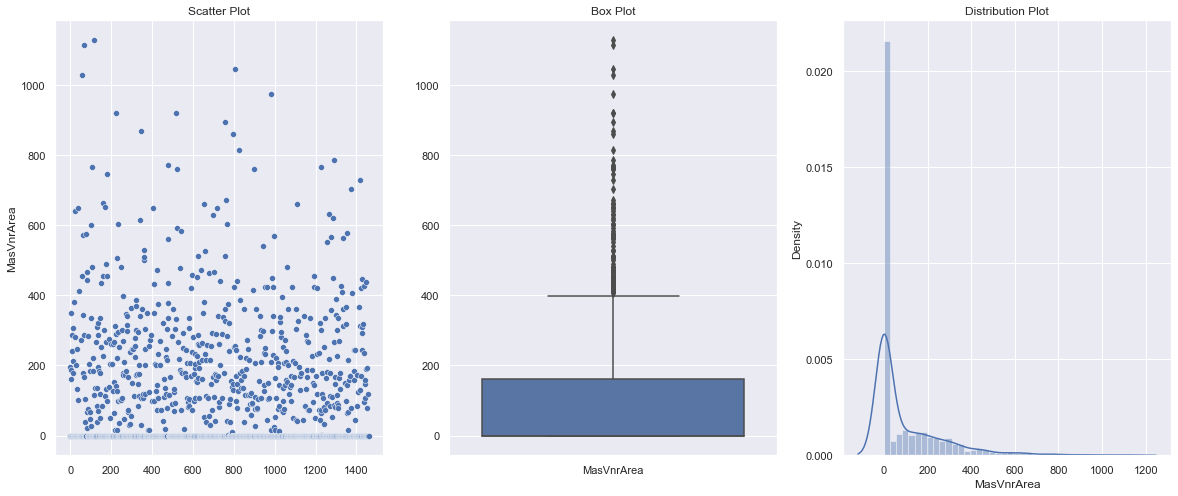

count    1451.000000
mean       99.782219
std       170.043928
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1129.000000
Name: MasVnrArea, dtype: float64


In [56]:
#Remove Outliers
Housing = Housing[Housing["MasVnrArea"] < Housing['MasVnrArea'].quantile(0.998) ]
NumericColumnPlots(Housing, 'MasVnrArea')

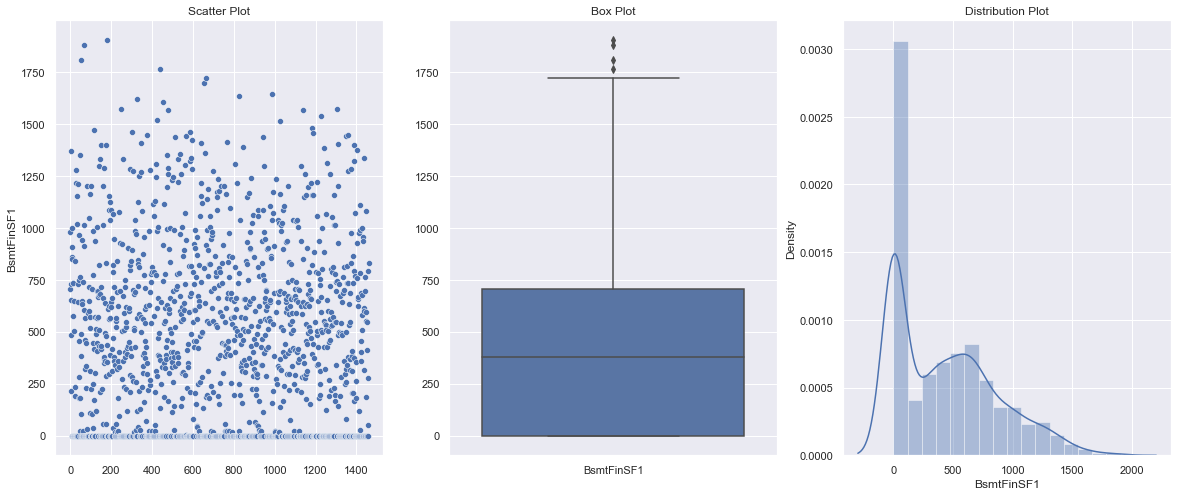

count    1448.000000
mean      432.996547
std       426.560872
min         0.000000
25%         0.000000
50%       378.000000
75%       704.250000
max      1904.000000
Name: BsmtFinSF1, dtype: float64


In [57]:
#Remove Outliers
Housing = Housing[Housing["BsmtFinSF1"] < Housing['BsmtFinSF1'].quantile(0.998) ]
NumericColumnPlots(Housing, 'BsmtFinSF1')

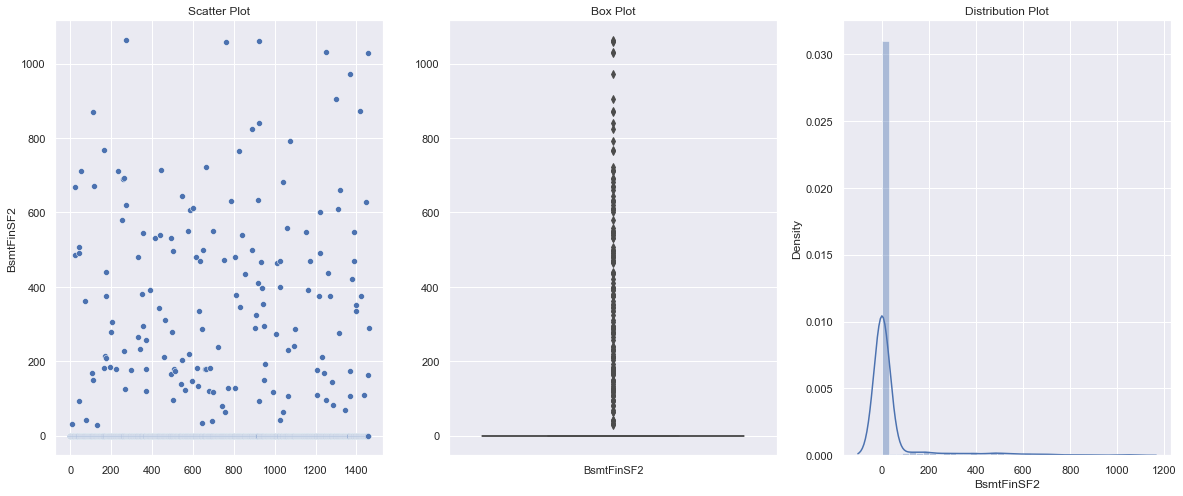

count    1443.000000
mean       42.348579
std       146.171075
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1063.000000
Name: BsmtFinSF2, dtype: float64


In [58]:
#Remove Outliers
Housing = Housing[Housing["BsmtFinSF2"] < Housing['BsmtFinSF2'].quantile(0.997) ]
NumericColumnPlots(Housing, 'BsmtFinSF2')

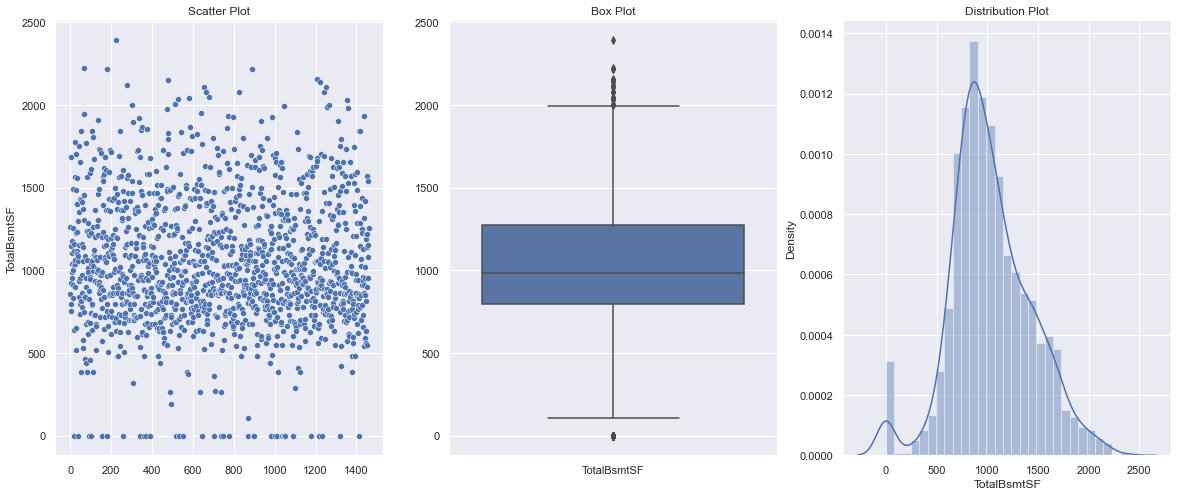

count    1438.000000
mean     1038.669680
std       393.708452
min         0.000000
25%       793.000000
50%       984.500000
75%      1272.750000
max      2392.000000
Name: TotalBsmtSF, dtype: float64


In [59]:
#Remove Outliers
Housing = Housing[Housing["TotalBsmtSF"] < Housing['TotalBsmtSF'].quantile(0.997) ]
NumericColumnPlots(Housing, 'TotalBsmtSF')

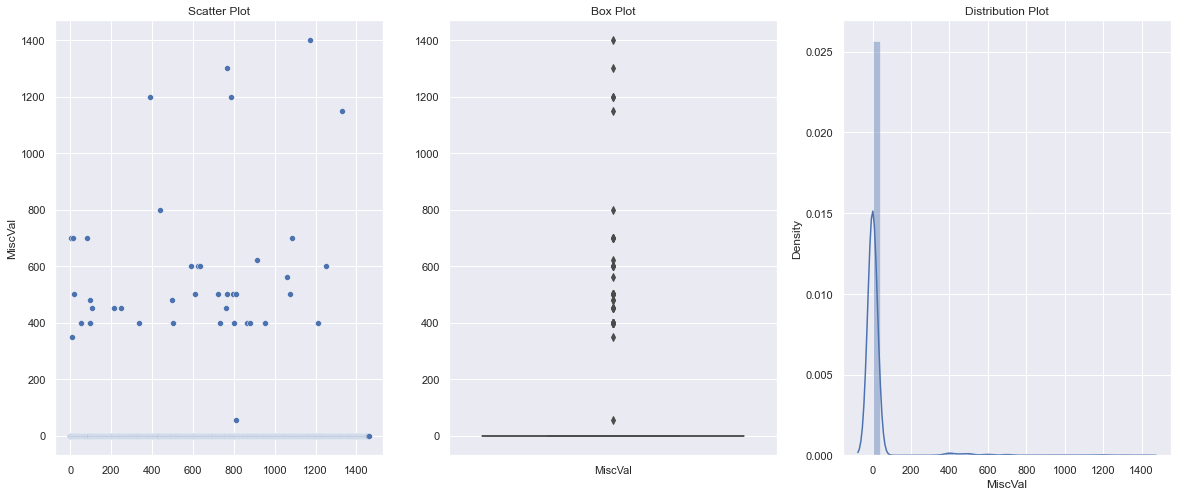

count    1430.000000
mean       17.128671
std       109.318028
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1400.000000
Name: MiscVal, dtype: float64


In [60]:
#Remove Outliers
Housing = Housing[Housing["MiscVal"] < Housing['MiscVal'].quantile(0.996) ]
NumericColumnPlots(Housing, 'MiscVal')

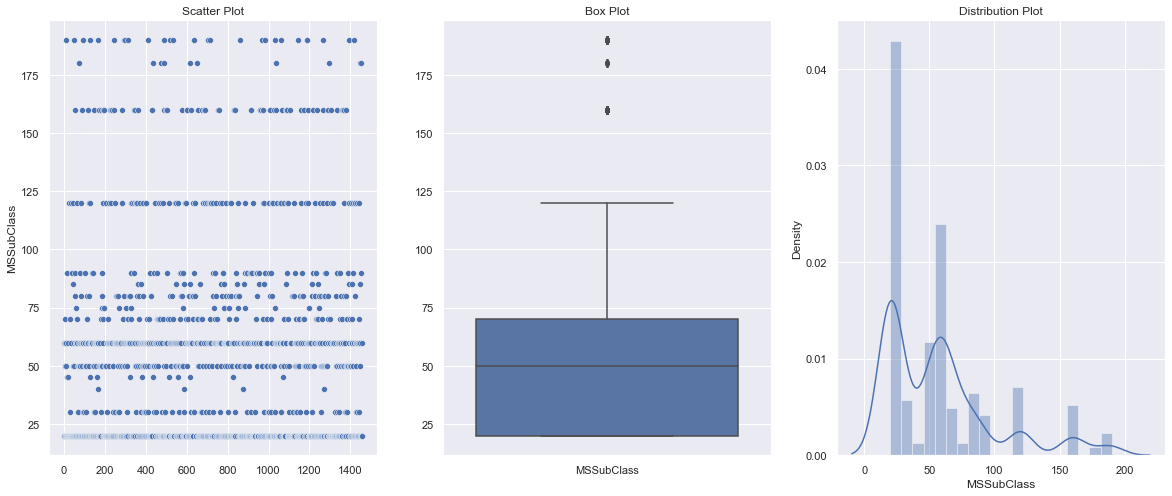

count    1430.000000
mean       57.013986
std        42.237538
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


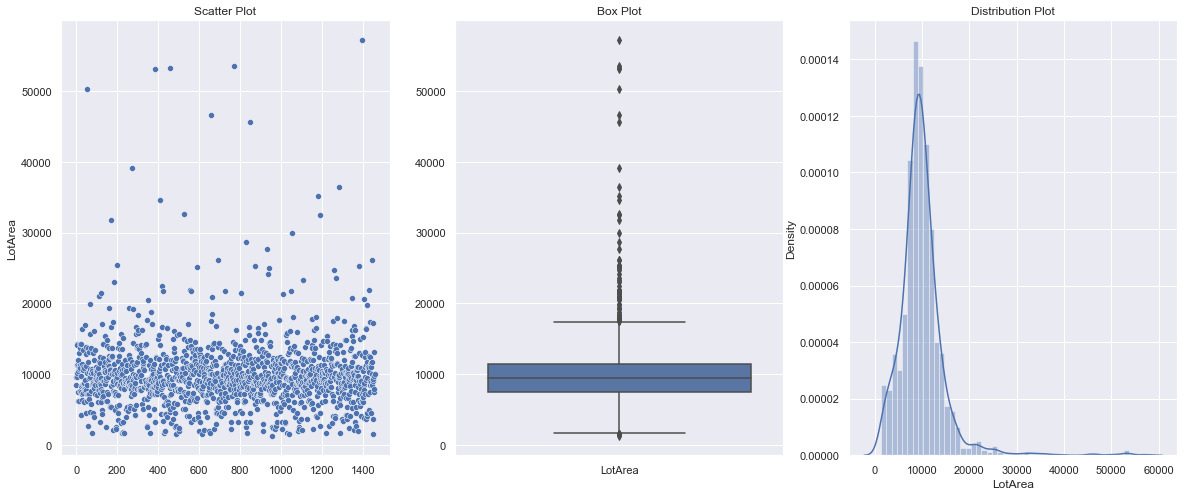

count     1430.000000
mean      9941.927972
std       5142.386321
min       1300.000000
25%       7500.000000
50%       9402.500000
75%      11475.000000
max      57200.000000
Name: LotArea, dtype: float64


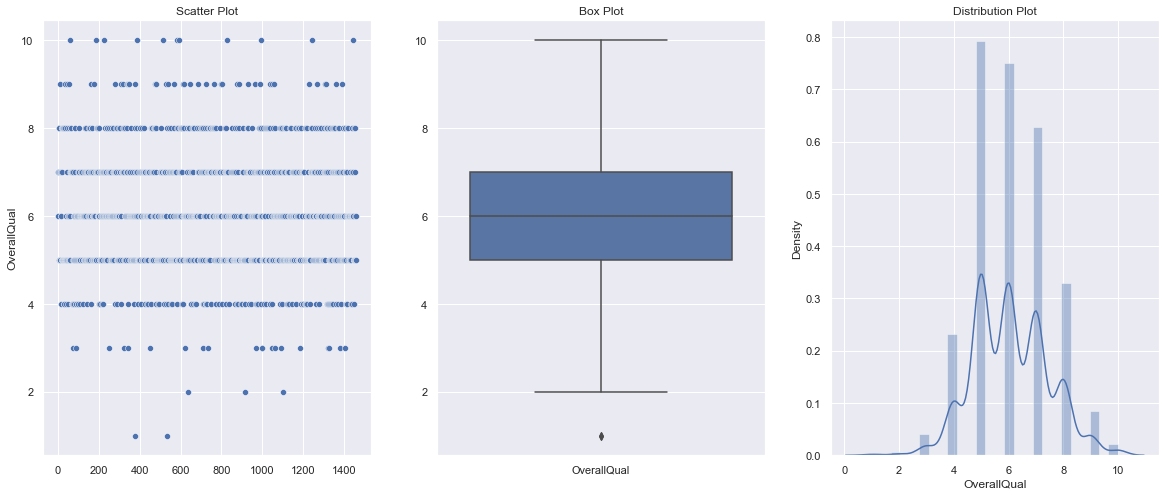

count    1430.000000
mean        6.072028
std         1.359100
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


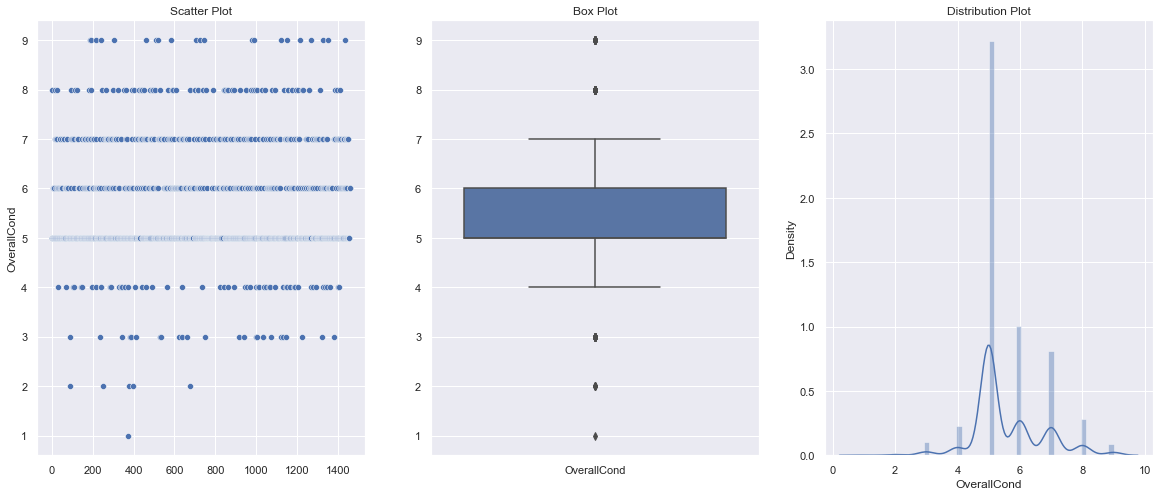

count    1430.000000
mean        5.576224
std         1.113311
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


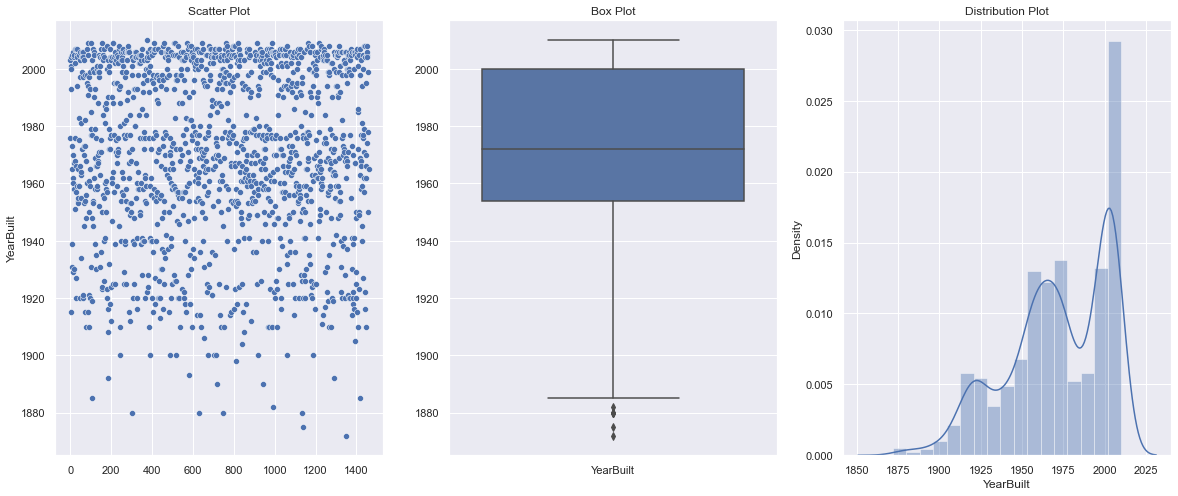

count    1430.000000
mean     1971.087413
std        30.327257
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


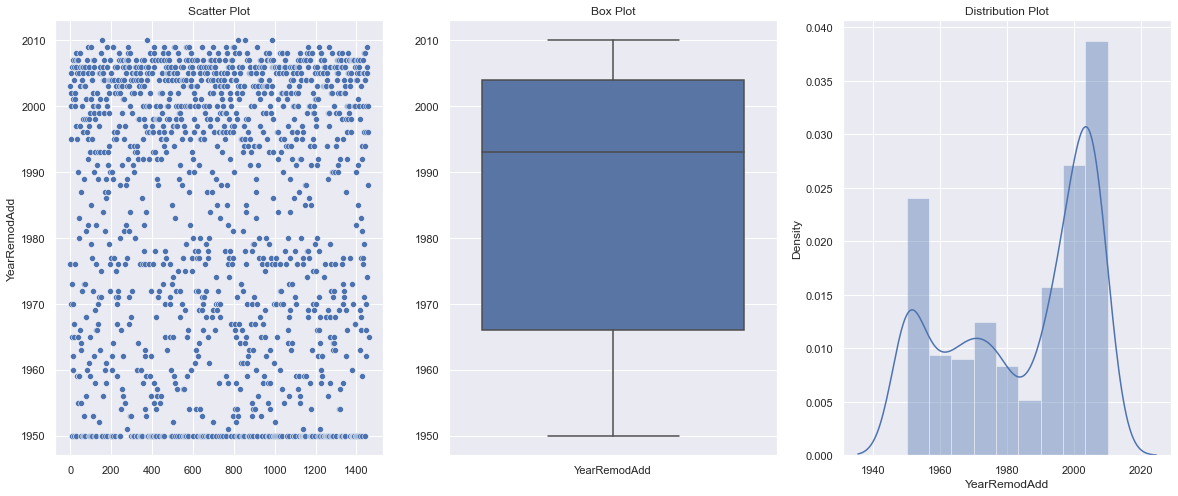

count    1430.000000
mean     1984.723776
std        20.718107
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


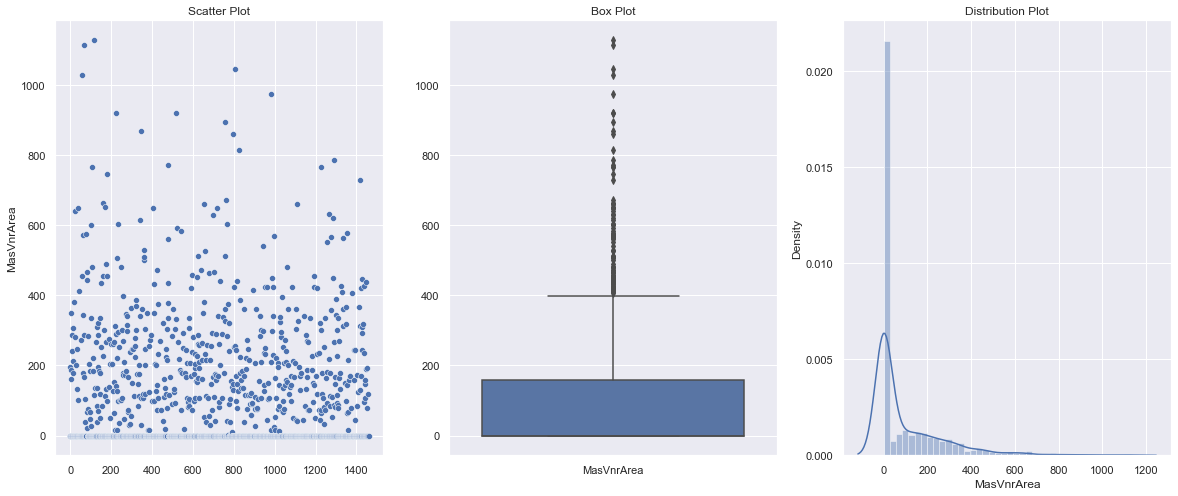

count    1430.000000
mean       98.709790
std       168.057024
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1129.000000
Name: MasVnrArea, dtype: float64


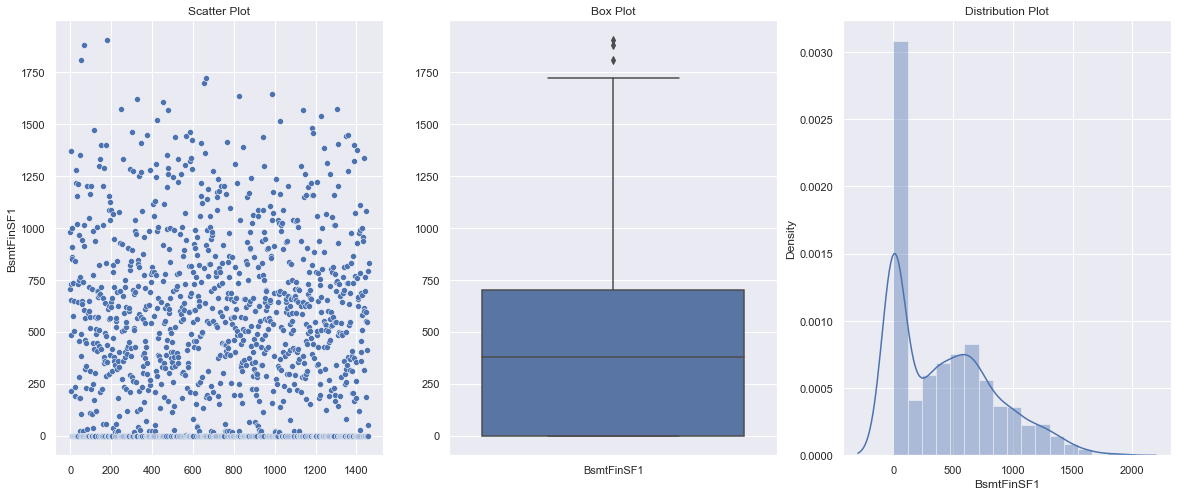

count    1430.000000
mean      430.158741
std       424.498879
min         0.000000
25%         0.000000
50%       377.500000
75%       700.000000
max      1904.000000
Name: BsmtFinSF1, dtype: float64


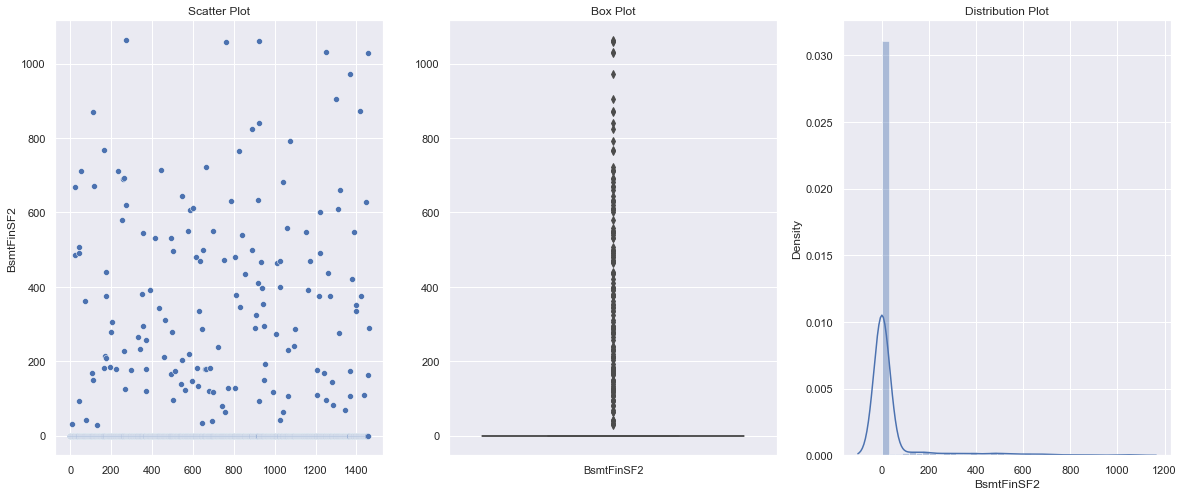

count    1430.000000
mean       41.420280
std       145.199408
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1063.000000
Name: BsmtFinSF2, dtype: float64


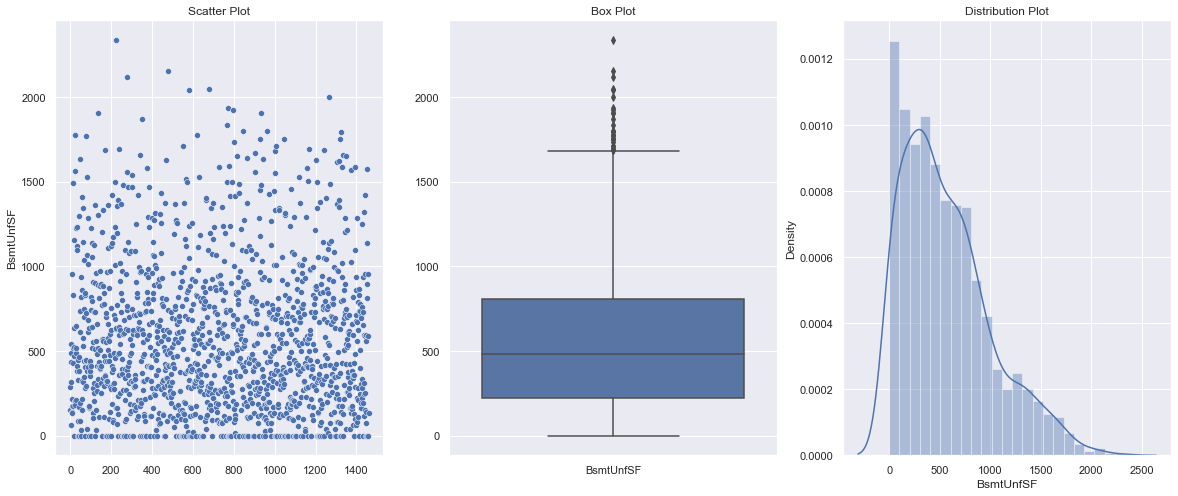

count    1430.000000
mean      567.220280
std       440.585033
min         0.000000
25%       224.250000
50%       480.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


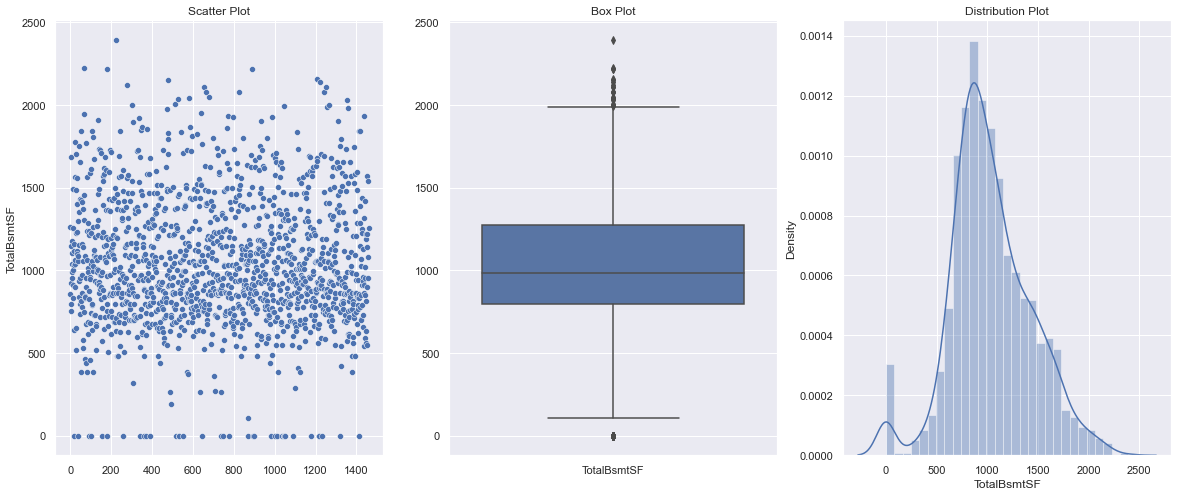

count    1430.000000
mean     1038.799301
std       393.249244
min         0.000000
25%       793.000000
50%       983.500000
75%      1271.750000
max      2392.000000
Name: TotalBsmtSF, dtype: float64


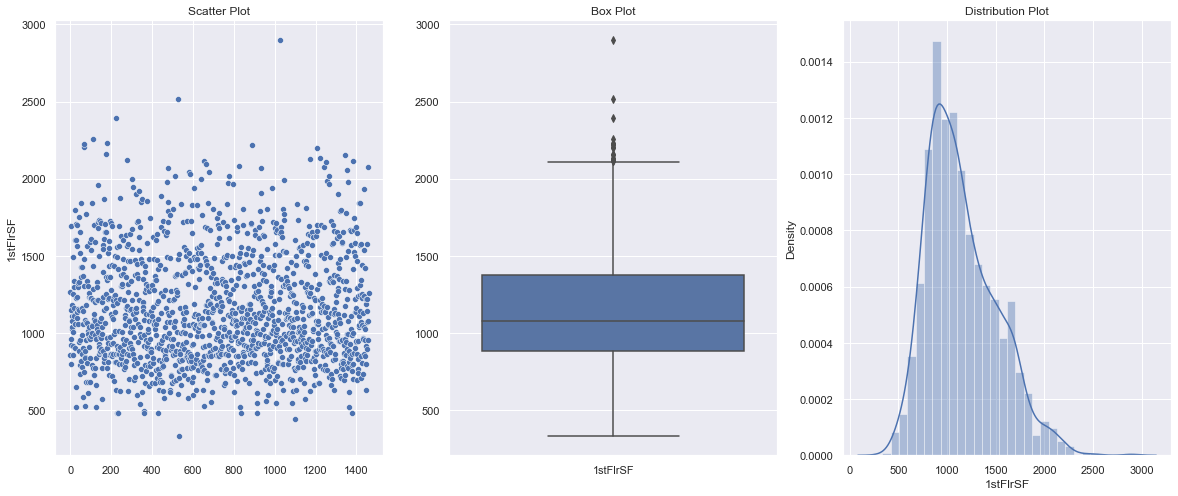

count    1430.000000
mean     1148.276224
std       357.322484
min       334.000000
25%       879.250000
50%      1080.000000
75%      1372.000000
max      2898.000000
Name: 1stFlrSF, dtype: float64


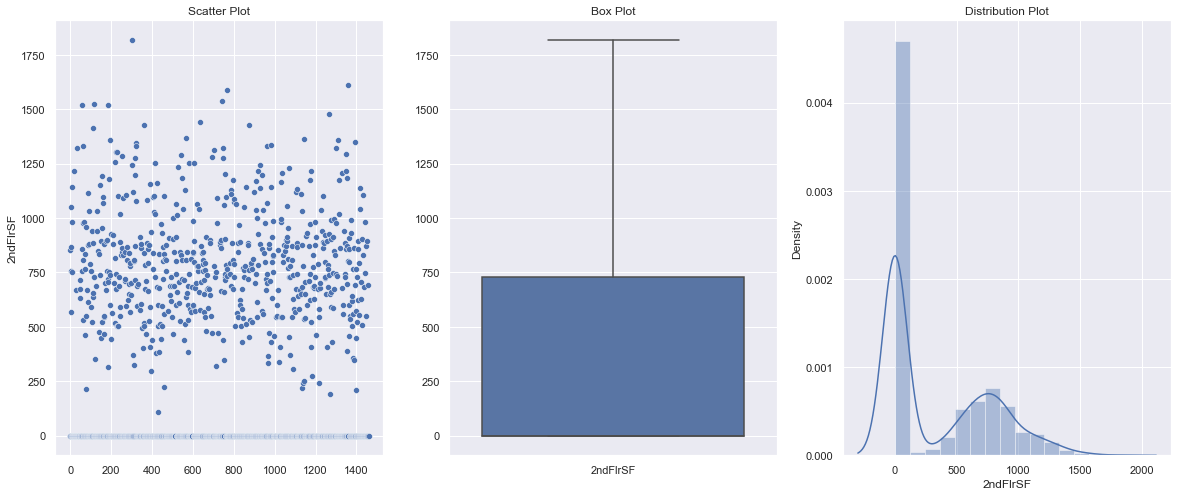

count    1430.000000
mean      343.072727
std       428.967785
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1818.000000
Name: 2ndFlrSF, dtype: float64


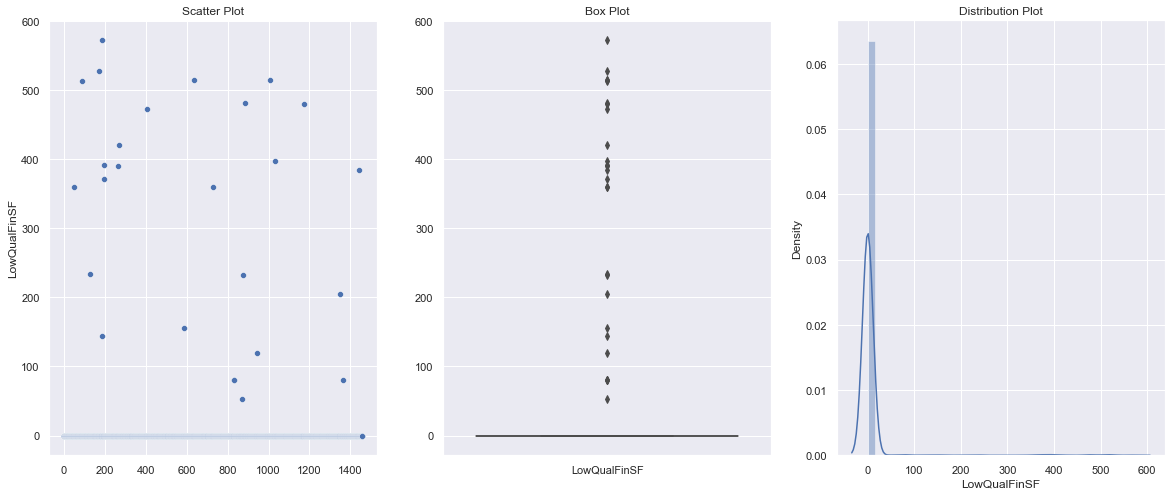

count    1430.000000
mean        5.967133
std        49.123368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


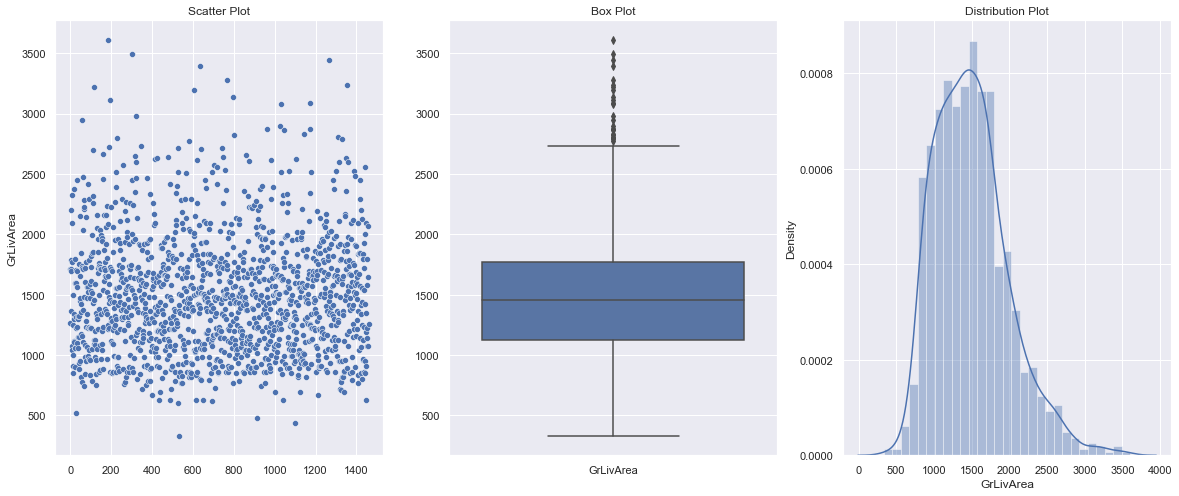

count    1430.000000
mean     1497.316084
std       488.178370
min       334.000000
25%      1126.000000
50%      1456.000000
75%      1767.750000
max      3608.000000
Name: GrLivArea, dtype: float64


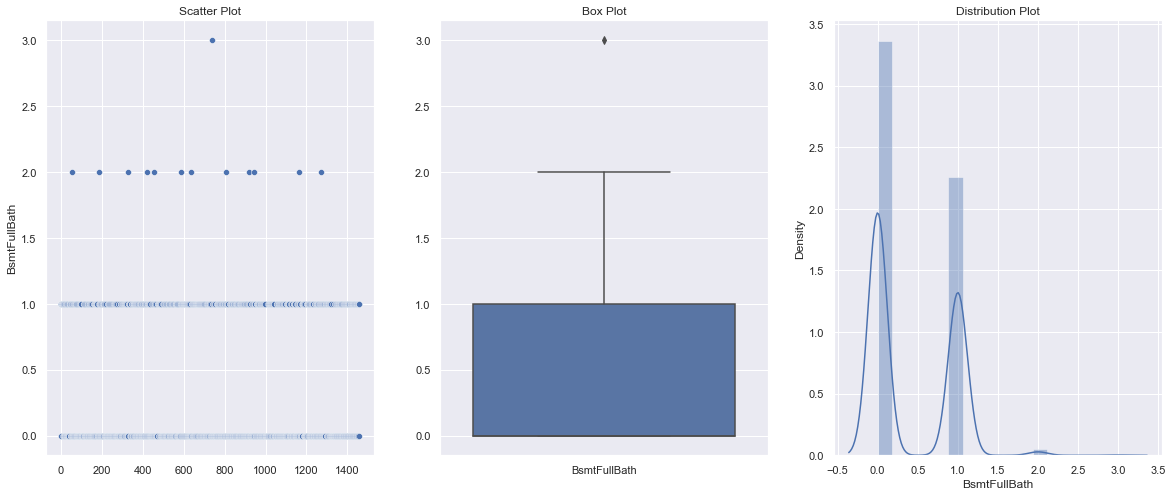

count    1430.000000
mean        0.416783
std         0.514042
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


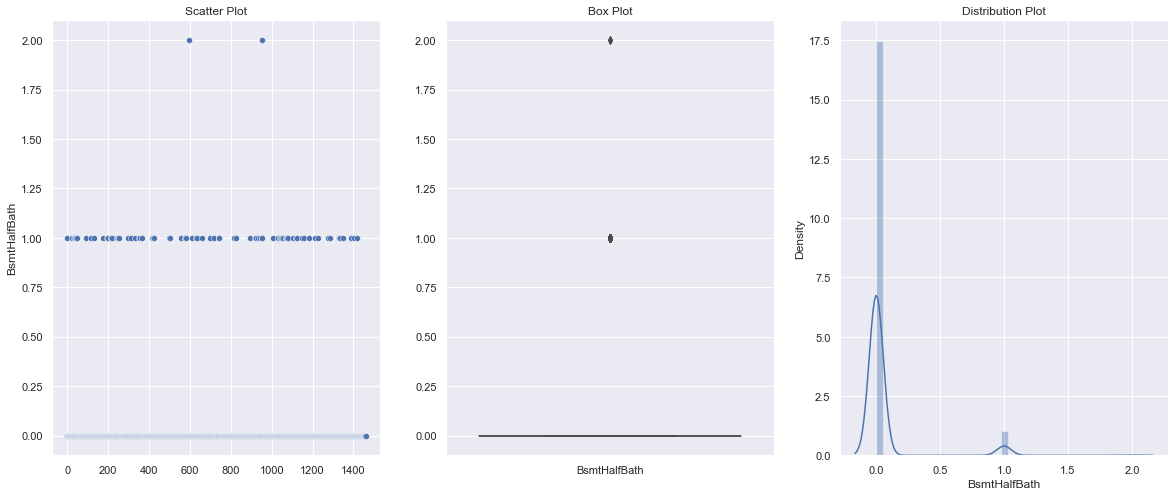

count    1430.000000
mean        0.057343
std         0.238519
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


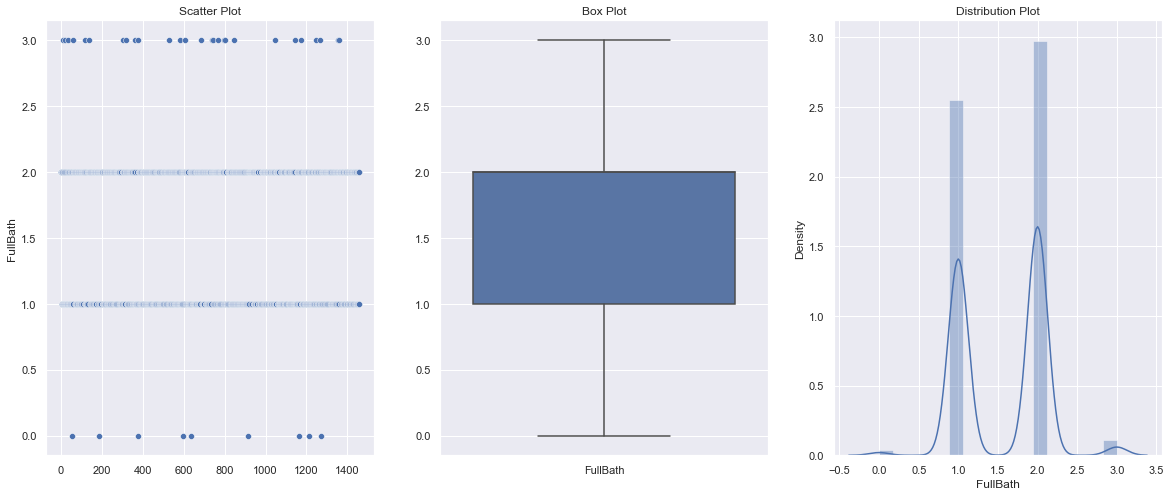

count    1430.000000
mean        1.555944
std         0.545370
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


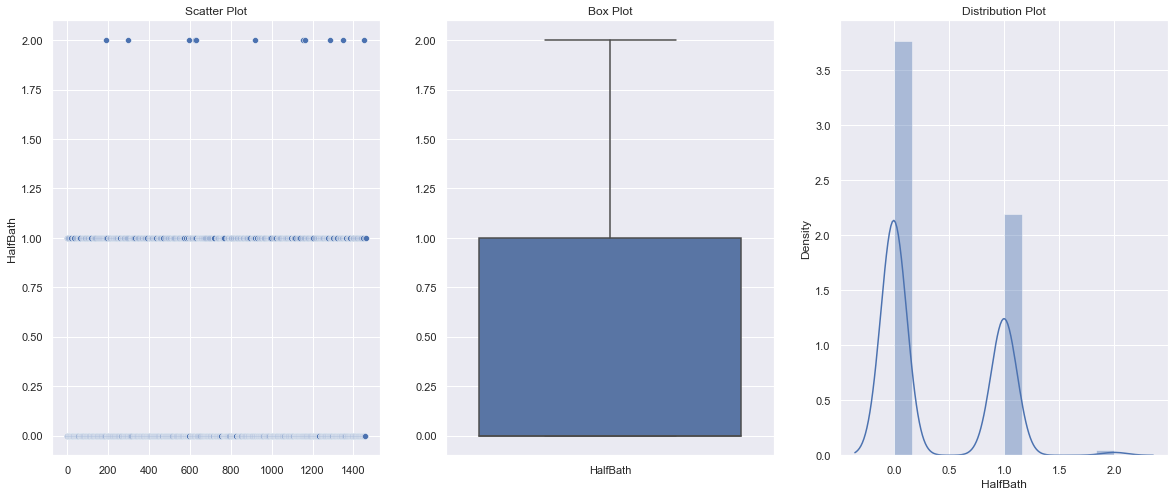

count    1430.000000
mean        0.380420
std         0.501259
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


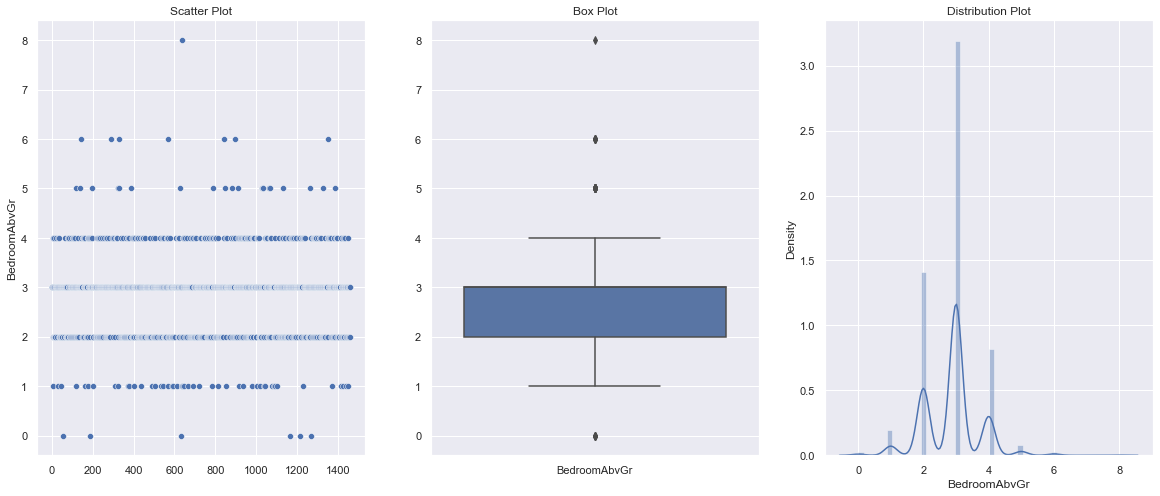

count    1430.000000
mean        2.863636
std         0.812089
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


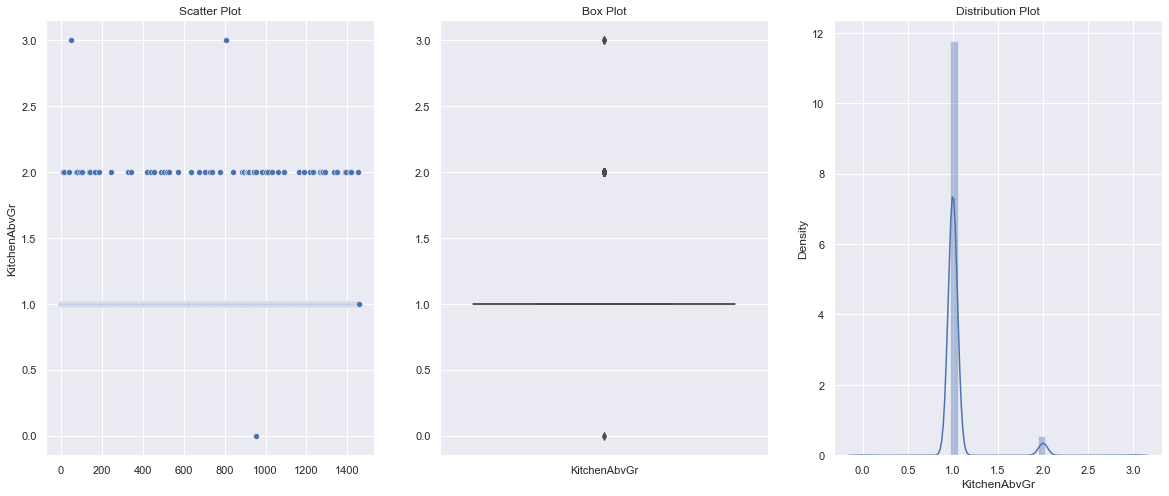

count    1430.000000
mean        1.046154
std         0.219666
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


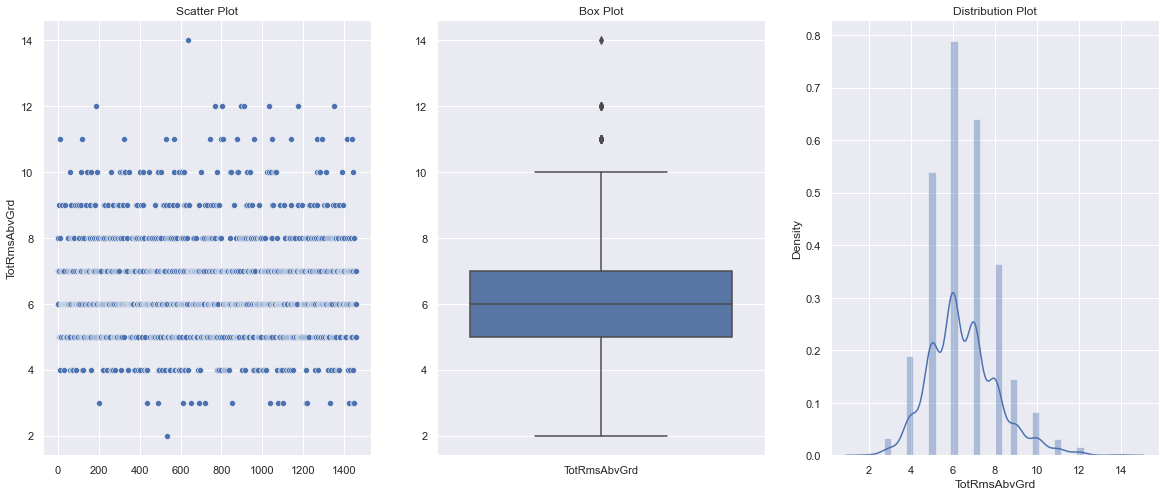

count    1430.000000
mean        6.487413
std         1.591895
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


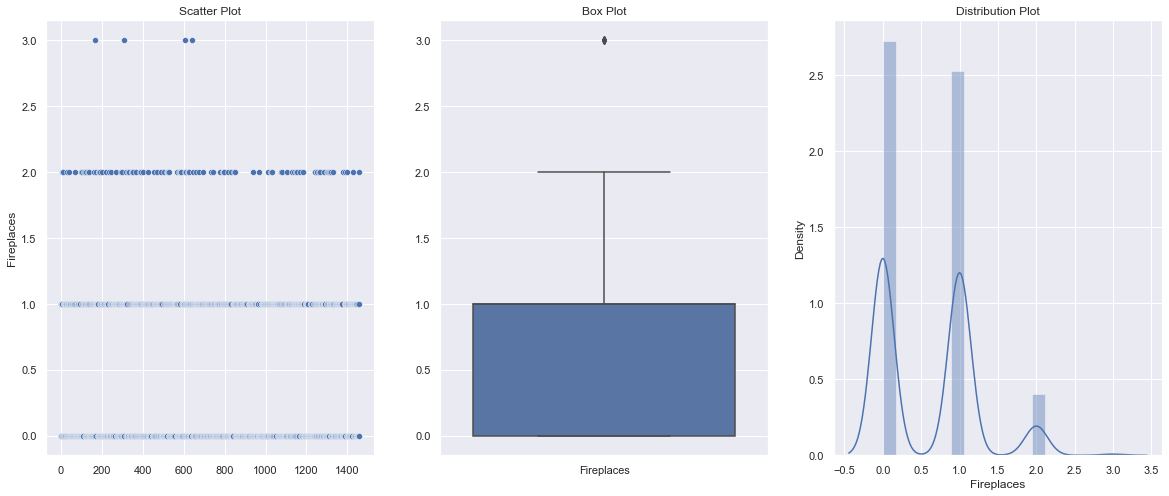

count    1430.000000
mean        0.596503
std         0.632778
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


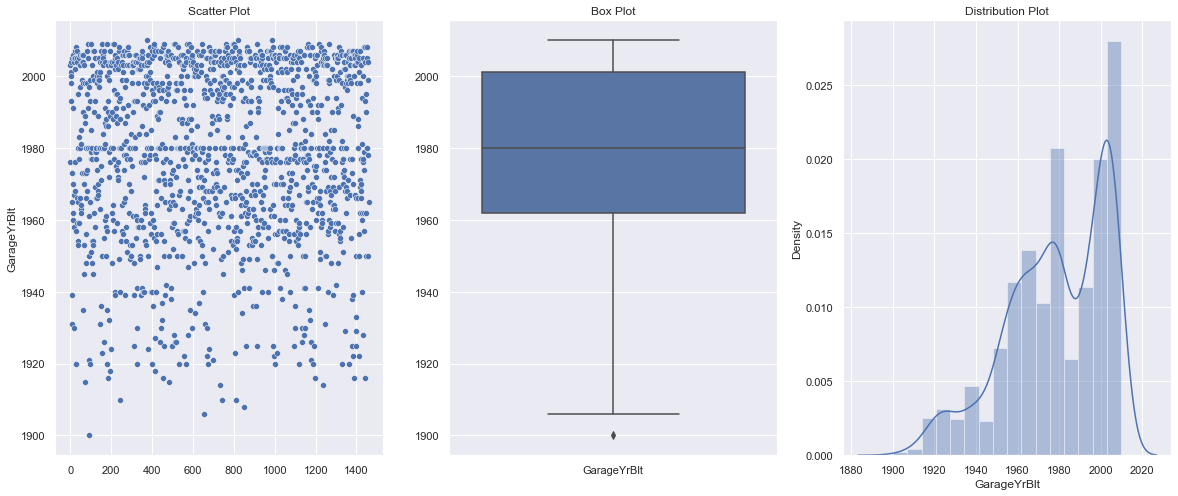

count    1430.000000
mean     1978.488811
std        24.076931
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


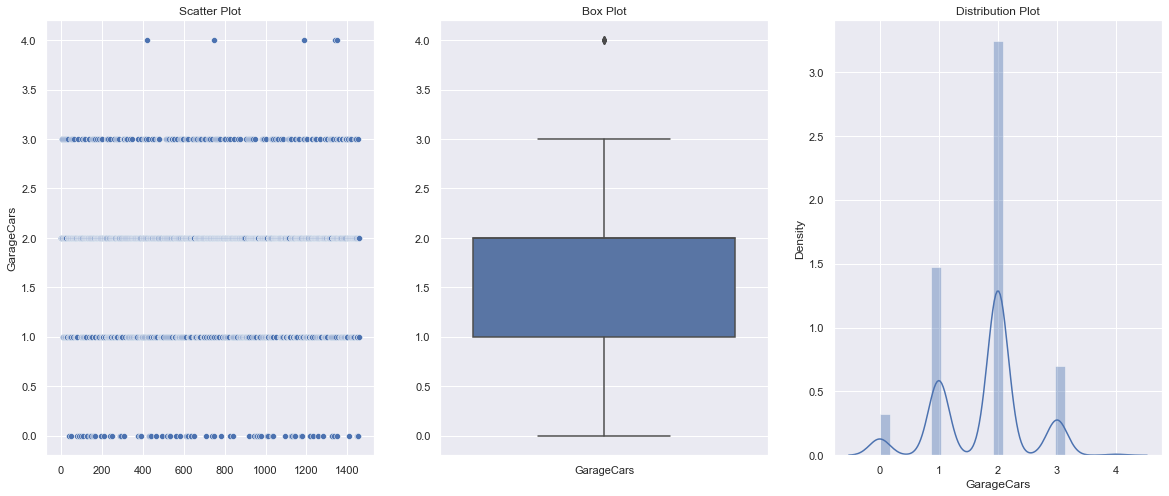

count    1430.000000
mean        1.760140
std         0.746688
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


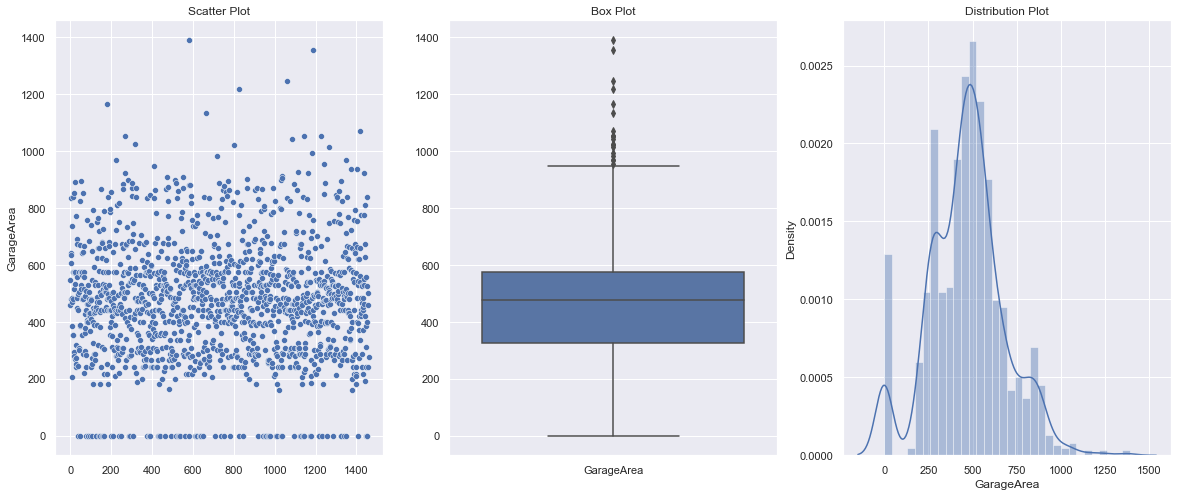

count    1430.000000
mean      470.108392
std       212.075871
min         0.000000
25%       326.250000
50%       476.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64


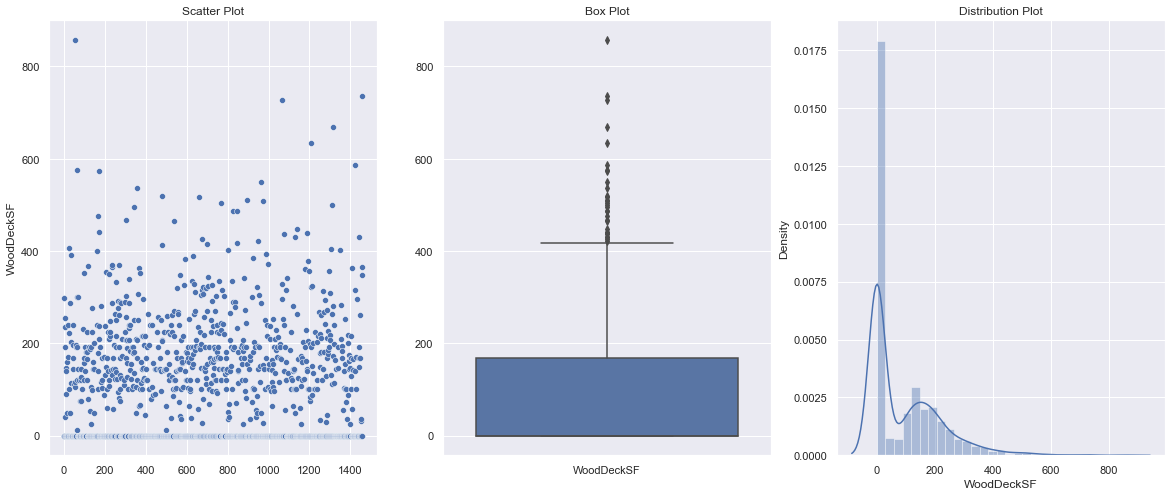

count    1430.000000
mean       92.735664
std       123.497373
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


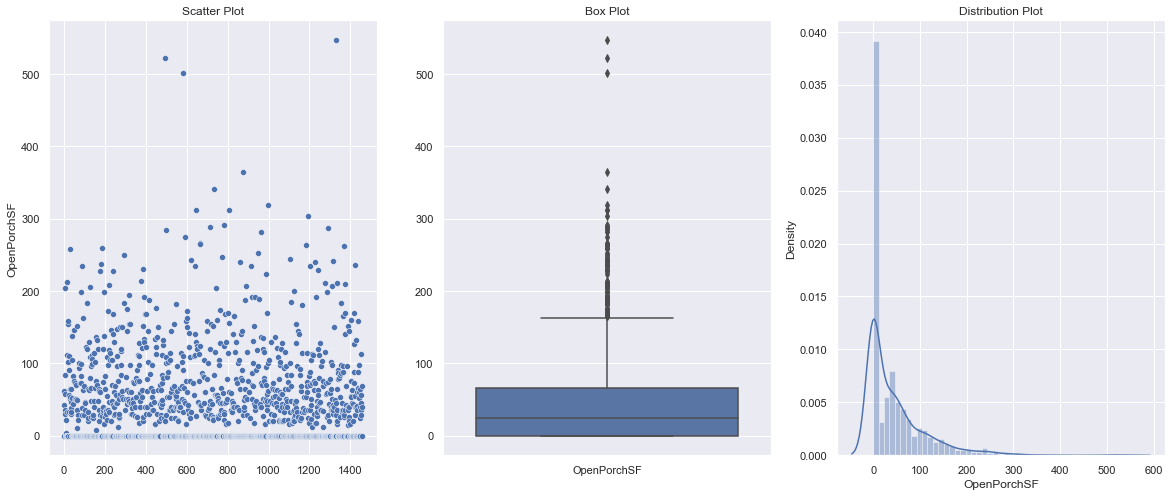

count    1430.000000
mean       45.915385
std        64.956156
min         0.000000
25%         0.000000
50%        24.000000
75%        66.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


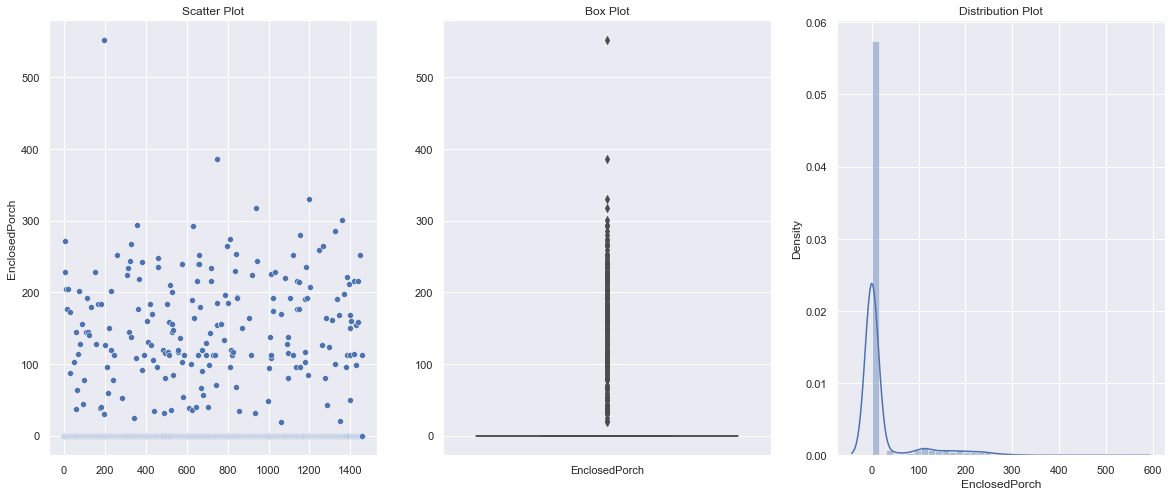

count    1430.000000
mean       22.109790
std        61.182148
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


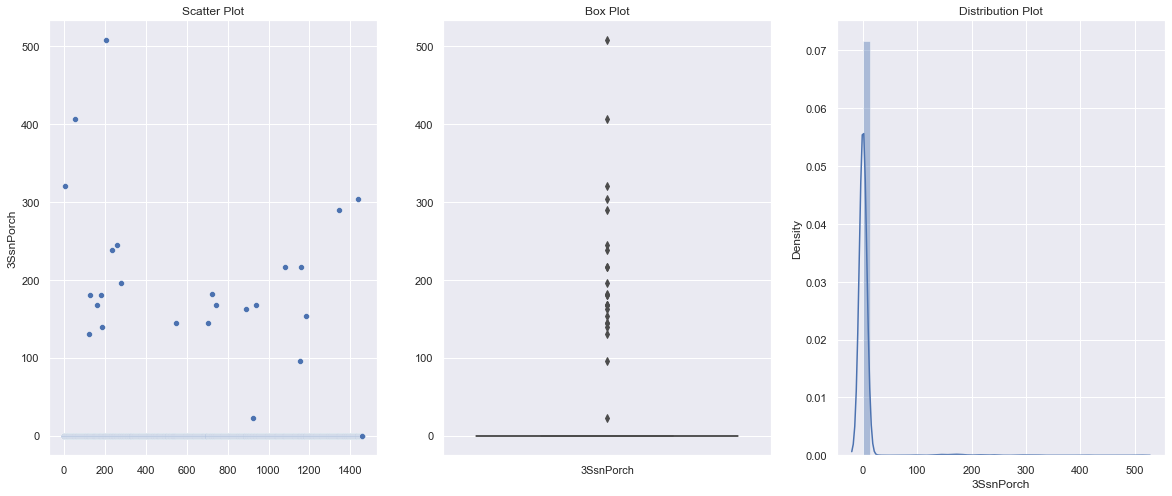

count    1430.000000
mean        3.481119
std        29.619266
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


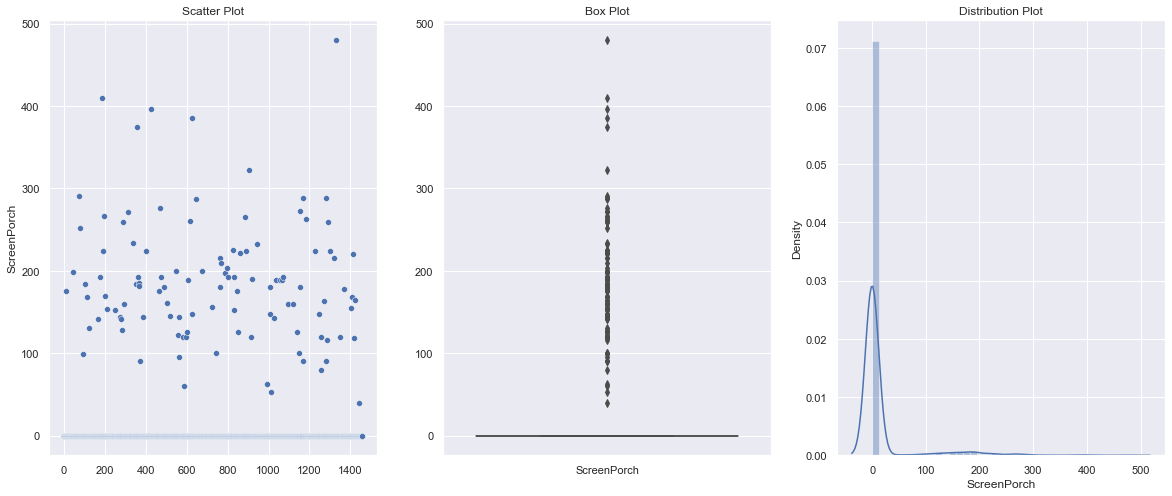

count    1430.000000
mean       14.378322
std        53.984293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


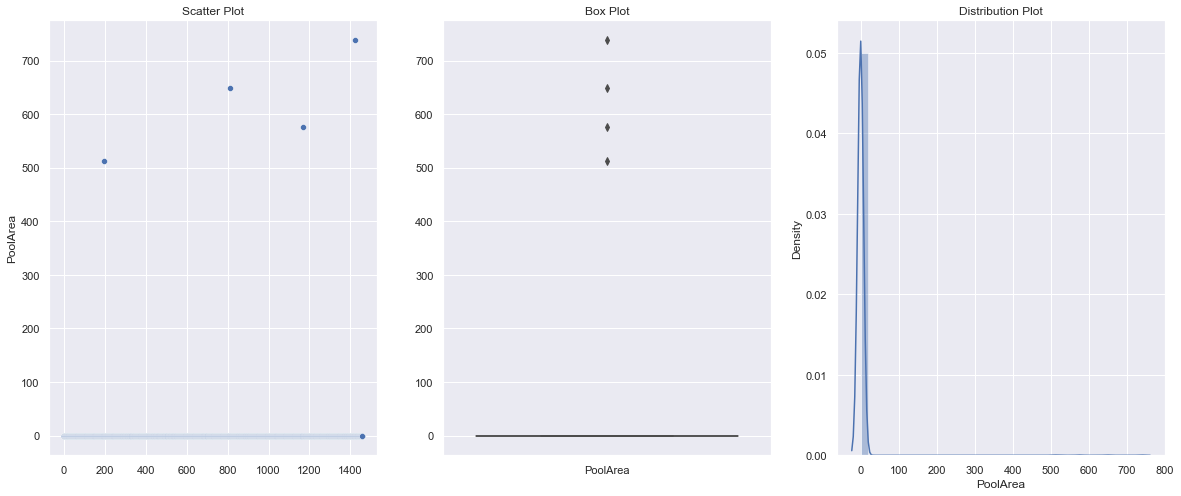

count    1430.00000
mean        1.73007
std        32.97886
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       738.00000
Name: PoolArea, dtype: float64


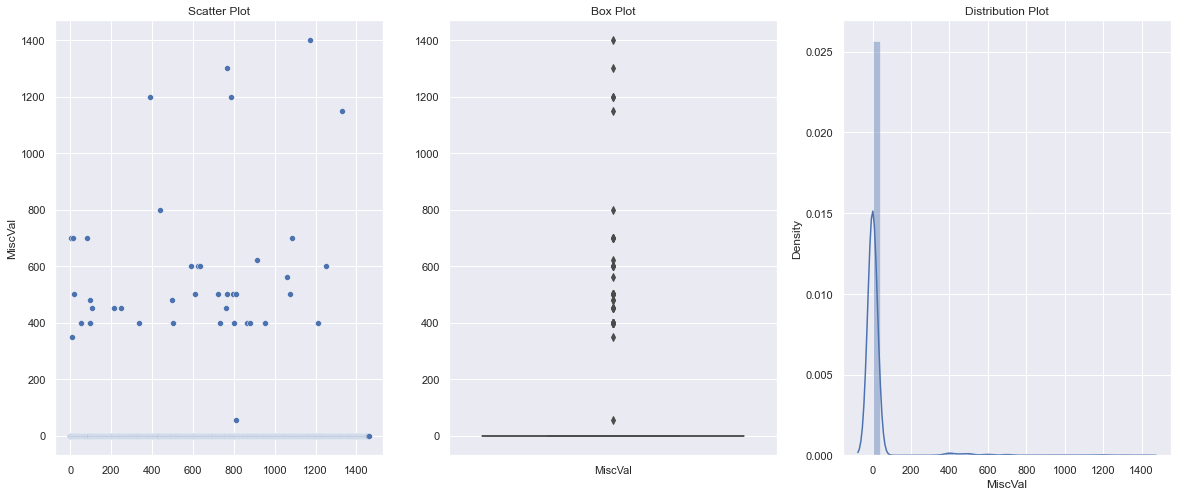

count    1430.000000
mean       17.128671
std       109.318028
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1400.000000
Name: MiscVal, dtype: float64


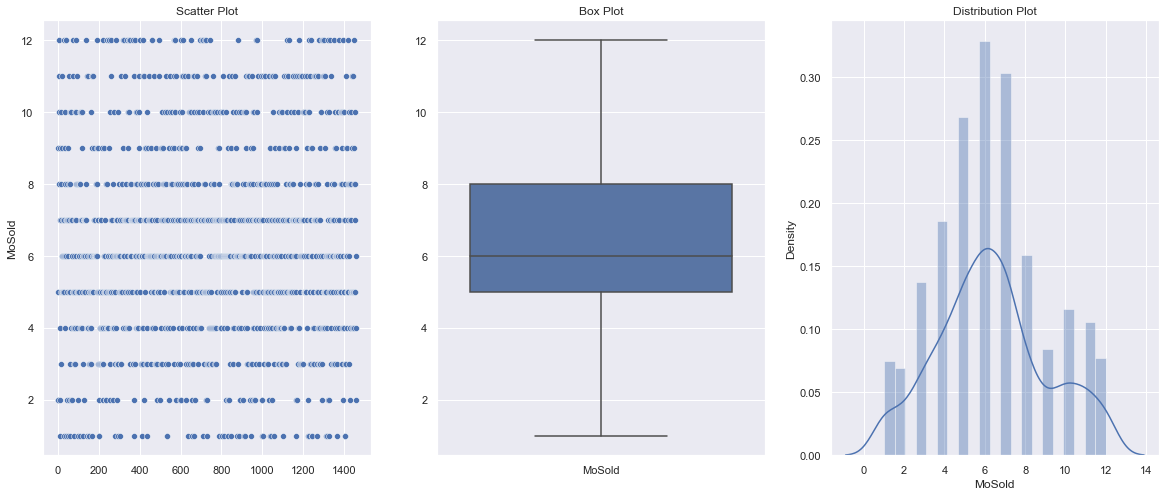

count    1430.000000
mean        6.327972
std         2.709027
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


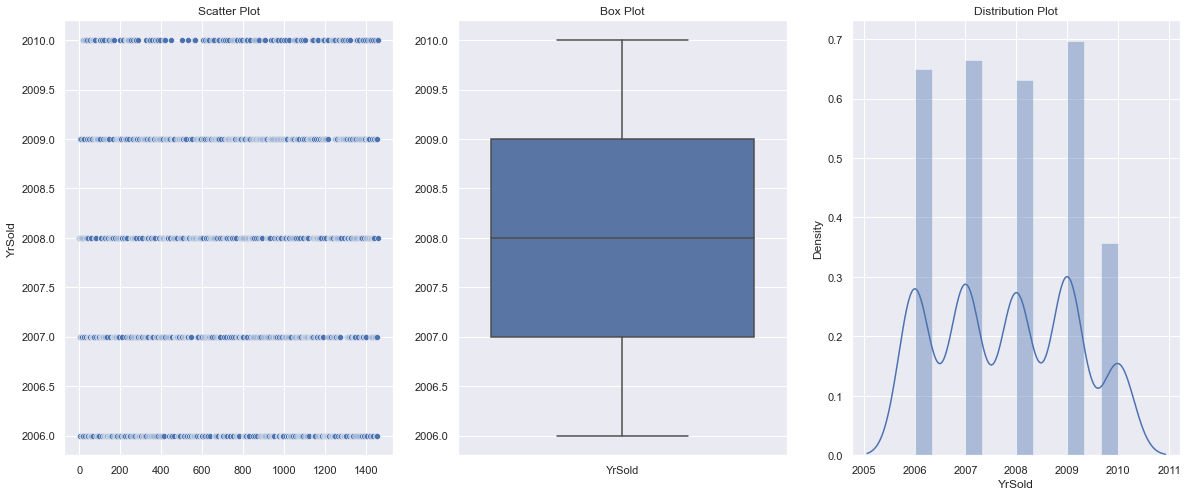

count    1430.000000
mean     2007.814685
std         1.327929
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


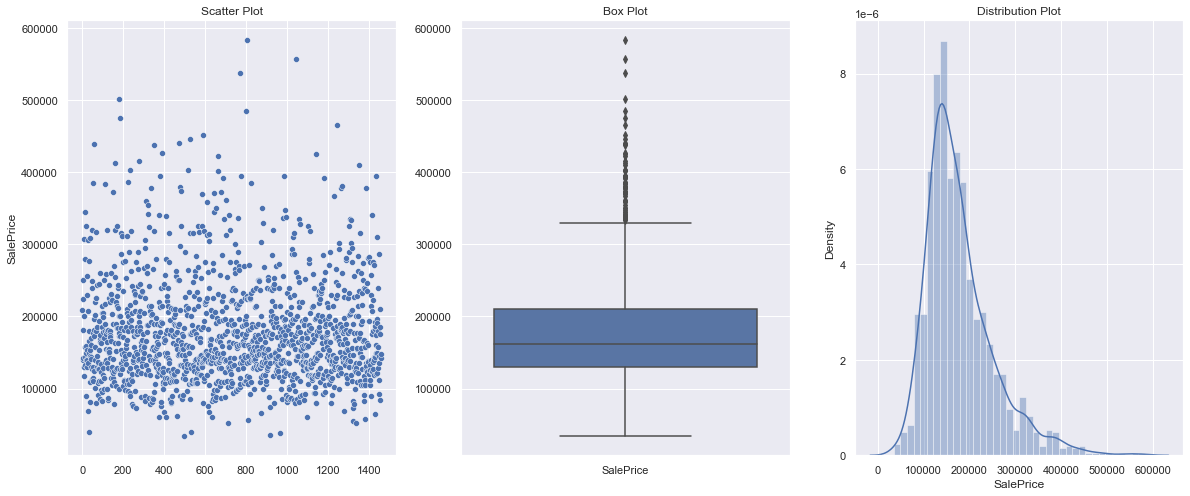

count      1430.000000
mean     178142.684615
std       73524.688079
min       34900.000000
25%      129500.000000
50%      161500.000000
75%      210750.000000
max      582933.000000
Name: SalePrice, dtype: float64


In [61]:
#check the distribution after removing outliers
for index, col in enumerate(numerical_columns):
    NumericColumnPlots(Housing, col)

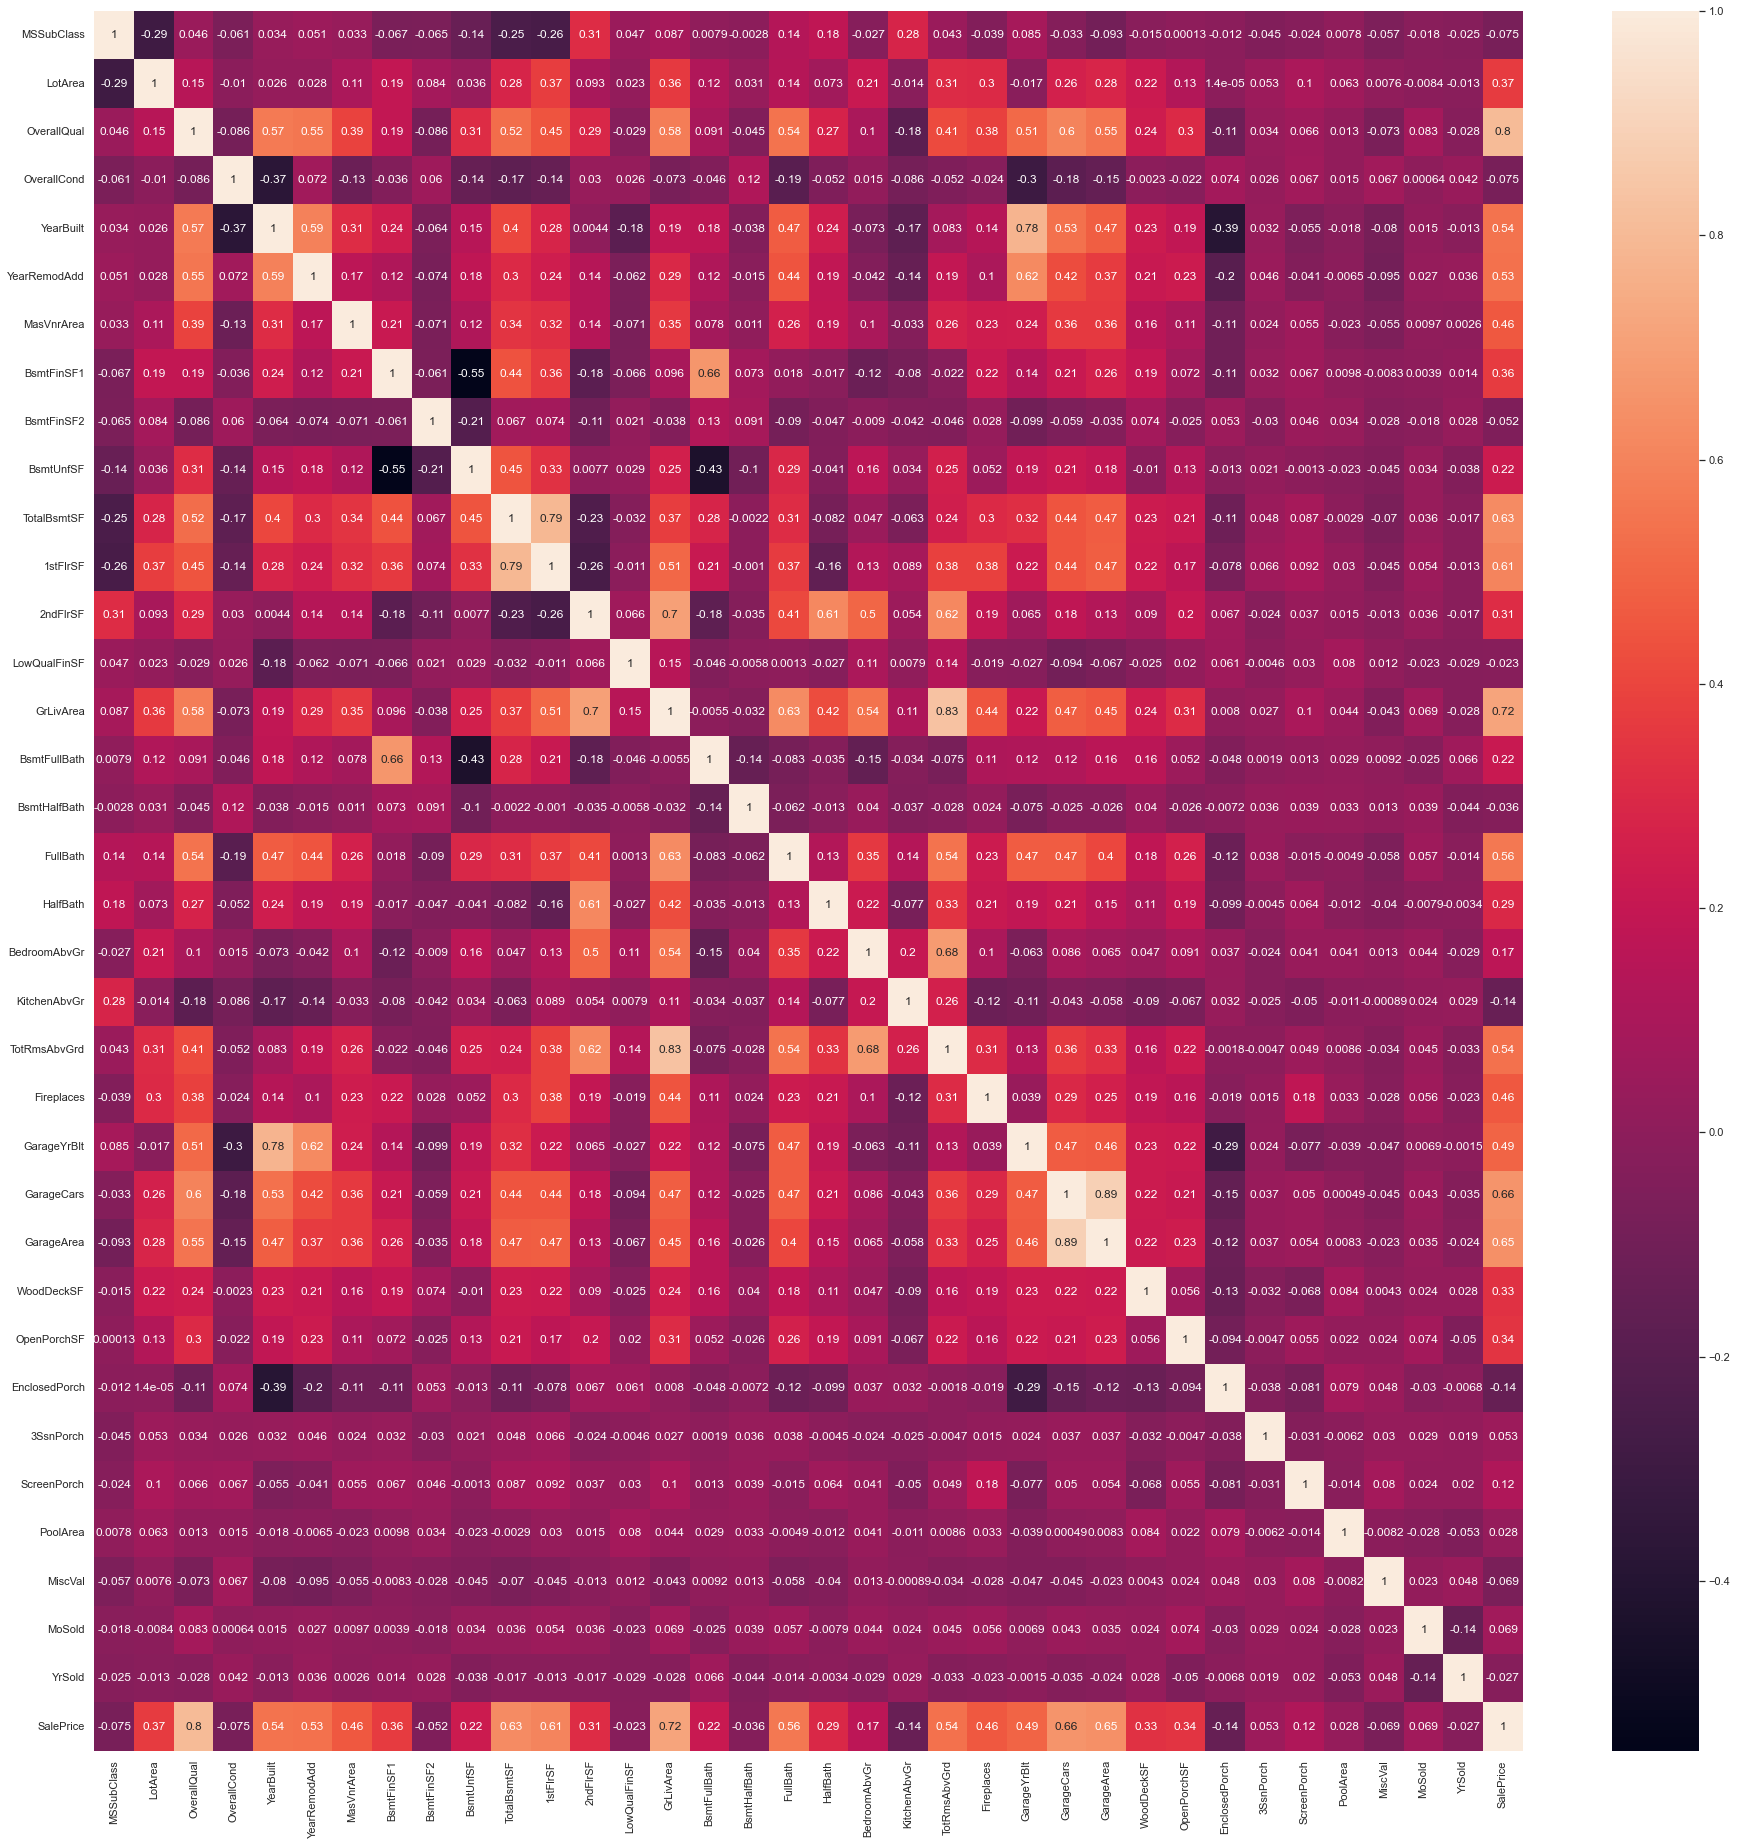

In [62]:
plt.figure(figsize=(32,32))
sns.heatmap(Housing[numerical_columns].corr(), annot = True)
plt.show()

### Modelling

In [63]:
#Convert to int values for categorical columns

CentralAir = {'N': 0, 'Y': 1}
Housing['CentralAir'] = Housing['CentralAir'].map(CentralAir)
print('CentralAir Unique Values :\n', Housing['CentralAir'].unique())

MSZoning = {'A': 1, 'C (all)': 0, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7,'RM': 8}
Housing['MSZoning'] = Housing['MSZoning'].map(MSZoning)
print('MSZoning Unique Values :\n', Housing['MSZoning'].unique())

LotShape = {'Reg': 1, 'IR1': 2, 'IR2':3,'IR3':4}
Housing['LotShape'] = Housing['LotShape'].map(LotShape)
print('LotShape Unique Values :\n', Housing['LotShape'].unique())

LandContour = {'Lvl': 1, 'Bnk': 2, 'HLS':3,'Low':4}
Housing['LandContour'] = Housing['LandContour'].map(LandContour)
print('LandContour Unique Values :\n', Housing['LandContour'].unique())

LotConfig = {'Inside': 1, 'Corner': 2, 'CulDSac':3,'FR2':4, 'FR3':5}
Housing['LotConfig'] = Housing['LotConfig'].map(LotConfig)
print('LotConfig Unique Values :\n', Housing['LotConfig'].unique())

LandSlope = {'Gtl': 1, 'Mod': 2, 'Sev':3 }
Housing['LandSlope'] = Housing['LandSlope'].map(LandSlope)
print('LandSlope Unique Values :\n', Housing['LandSlope'].unique())

BldgType = {'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}
Housing['BldgType'] = Housing['BldgType'].map(BldgType)
print('BldgType Unique Values :\n', Housing['BldgType'].unique())

Condition = {'Artery': 1, 'Feedr': 2, 'Norm':3,'RRNn':4 ,'RRAn': 5, 
             'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9}
Housing['Condition1'] = Housing['Condition1'].map(Condition)
print('Condition1 Unique Values :\n', Housing['Condition1'].unique())
Housing['Condition2'] = Housing['Condition2'].map(Condition)
print('Condition2 Unique Values :\n', Housing['Condition2'].unique())

HouseStyle = {'1Story': 1, '1.5Fin': 2, '1.5Unf':3, '2Story':4 , '2.5Fin': 5, 
              '2.5Unf':6, 'SFoyer':7, 'SLvl':8}
Housing['HouseStyle'] = Housing['HouseStyle'].map(HouseStyle)
print('HouseStyle Unique Values :\n', Housing['HouseStyle'].unique())

RoofStyle = {'Flat': 1, 'Gable': 2, 'Gambrel':3, 'Hip':4 , 'Mansard': 5, 
             'Shed':6}
Housing['RoofStyle'] = Housing['RoofStyle'].map(RoofStyle)
print('RoofStyle Unique Values :\n', Housing['RoofStyle'].unique())

RoofMatl = {'ClyTile': 1, 'CompShg': 2, 'Gambrel':3, 'Membran':4 , 'Metal': 5, 
            'Roll':6, 'Tar&Grv':7, 'WdShake':8, 'WdShngl':9}
Housing['RoofMatl'] = Housing['RoofMatl'].map(RoofMatl)
print('RoofMatl Unique Values :\n', Housing['RoofMatl'].unique())

Exterior1st = {'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,
       'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,
       'Stone':13, 'ImStucc':14, 'CBlock':15 }
Housing['Exterior1st'] = Housing['Exterior1st'].map(Exterior1st)
print('Exterior1st Unique Values :\n', Housing['Exterior1st'].unique())

Exterior2nd = {'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,
       'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,
       'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16 }
Housing['Exterior2nd'] = Housing['Exterior2nd'].map(Exterior2nd)
print('Exterior2nd Unique Values :\n', Housing['Exterior2nd'].unique())

MasVnrType = {'BrkCmn': 1, 'BrkFace': 2, 'CBlock':3, 'None':4 , 'Stone': 5}
Housing['MasVnrType'] = Housing['MasVnrType'].map(MasVnrType)
print('MasVnrType Unique Values :\n', Housing['MasVnrType'].unique())

Exter = {'Ex': 1, 'Gd': 2, 'TA':3, 'Fa':4 , 'Po': 5, 'NA':6}
Housing['ExterQual'] = Housing['ExterQual'].map(Exter)
print('ExterQual Unique Values :\n', Housing['ExterQual'].unique())
Housing['ExterCond'] = Housing['ExterCond'].map(Exter)
print('ExterCond Unique Values :\n', Housing['ExterCond'].unique())
Housing['BsmtQual'] = Housing['BsmtQual'].map(Exter)
print('BsmtQual Unique Values :\n', Housing['BsmtQual'].unique())
Housing['BsmtCond'] = Housing['BsmtCond'].map(Exter)
print('BsmtCond Unique Values :\n', Housing['BsmtCond'].unique())
Housing['HeatingQC'] = Housing['HeatingQC'].map(Exter)
print('HeatingQC Unique Values :\n', Housing['HeatingQC'].unique())
Housing['KitchenQual'] = Housing['KitchenQual'].map(Exter)
print('KitchenQual Unique Values :\n', Housing['KitchenQual'].unique())
Housing['GarageQual'] = Housing['GarageQual'].map(Exter)
print('GarageQual Unique Values :\n', Housing['GarageQual'].unique())
Housing['GarageCond'] = Housing['GarageCond'].map(Exter)
print('GarageCond Unique Values :\n', Housing['GarageCond'].unique())

Foundation = {'BrkTil': 1, 'CBlock': 2, 'PConc':3, 'Slab':4 , 'Stone': 5, 'Wood': 6}
Housing['Foundation'] = Housing['Foundation'].map(Foundation)
print('Foundation Unique Values :\n', Housing['Foundation'].unique())

BsmtExposure = {'Gd': 1, 'Av': 2, 'Mn':3, 'No':4 , 'NA': 5}
Housing['BsmtExposure'] = Housing['BsmtExposure'].map(BsmtExposure)
print('BsmtExposure Unique Values :\n', Housing['BsmtExposure'].unique())

BsmtFin = {'GLQ': 1, 'ALQ': 2, 'BLQ':3, 'Rec':4 , 'LwQ': 5, 'Unf': 6, 'NA': 7}
Housing['BsmtFinType1'] = Housing['BsmtFinType1'].map(BsmtFin)
print('BsmtFinType1 Unique Values :\n', Housing['BsmtFinType1'].unique())
Housing['BsmtFinType2'] = Housing['BsmtFinType2'].map(BsmtFin)
print('BsmtFinType2 Unique Values :\n', Housing['BsmtFinType2'].unique())

Heating = {'Floor': 1, 'GasA': 2, 'GasW':3, 'Grav':4 , 'OthW': 5, 'Wall': 6}
Housing['Heating'] = Housing['Heating'].map(Heating)
print('Heating Unique Values :\n', Housing['Heating'].unique())

Electrical = {'SBrkr': 1, 'FuseA': 2, 'FuseF':3, 'FuseP':4 , 'Mix': 5}
Housing['Electrical'] = Housing['Electrical'].map(Electrical)
print('Electrical Unique Values :\n', Housing['Electrical'].unique())

Functional = {'Typ': 1, 'Min1': 2, 'Min2':3,'Mod':4, 'Maj1':5 , 'Maj2': 6, 'Sev': 7, 'Sal': 8}
Housing['Functional'] = Housing['Functional'].map(Functional)
print('Functional Unique Values :\n', Housing['Functional'].unique())

GarageType = {'2Types': 1, 'Attchd': 2, 'Basment':3, 'BuiltIn':4 , 'CarPort': 5,'Detchd': 6, 'NA': 7}
Housing['GarageType'] = Housing['GarageType'].map(GarageType)
print('GarageType Unique Values :\n', Housing['GarageType'].unique())

GarageFinish = {'Fin': 1, 'RFn': 2, 'Unf':3, 'NA':4}
Housing['GarageFinish'] = Housing['GarageFinish'].map(GarageFinish)
print('GarageFinish Unique Values :\n', Housing['GarageFinish'].unique())

PavedDrive = {'Y': 1, 'P': 2, 'N':3}
Housing['PavedDrive'] = Housing['PavedDrive'].map(PavedDrive)
print('PavedDrive Unique Values :\n', Housing['PavedDrive'].unique())

SaleType = {'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9}
Housing['SaleType'] = Housing['SaleType'].map(SaleType)
print('SaleType Unique Values :\n', Housing['SaleType'].unique())

SaleCondition = {'Normal': 1, 'Abnorml': 2, 'AdjLand':3, 'Alloca':4,'Family':5, 'Partial':6}
Housing['SaleCondition'] = Housing['SaleCondition'].map(SaleCondition)
print('SaleCondition Unique Values :\n', Housing['SaleCondition'].unique())

CentralAir Unique Values :
 [1 0]
MSZoning Unique Values :
 [6 8 0 3 5]
LotShape Unique Values :
 [1 2 3 4]
LandContour Unique Values :
 [1 2 4 3]
LotConfig Unique Values :
 [1 4 2 3 5]
LandSlope Unique Values :
 [1 2 3]
BldgType Unique Values :
 [1 2 3 4 5]
Condition1 Unique Values :
 [3 2 6 1 9 4 5 7 8]
Condition2 Unique Values :
 [3 1 4 2 7 6 5]
HouseStyle Unique Values :
 [4 1 2 3 7 8 6 5]
RoofStyle Unique Values :
 [2 4 3 5 1 6]
RoofMatl Unique Values :
 [2 9 5 8 4 7 6]
Exterior1st Unique Values :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Exterior2nd Unique Values :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
MasVnrType Unique Values :
 [2 4 5 1]
ExterQual Unique Values :
 [2 3 1 4]
ExterCond Unique Values :
 [3 2 4 5 1]
BsmtQual Unique Values :
 [2 3 1 4]
BsmtCond Unique Values :
 [3 2 4 5]
HeatingQC Unique Values :
 [1 2 3 4 5]
KitchenQual Unique Values :
 [2 3 1 4]
GarageQual Unique Values :
 [3 4 2 1 5]
GarageCond Unique Values :
 [3 4 2 5 1]
Foundation Unique Val

In [64]:
#Create dummy variables for neighborhood and renaming new variables
Neighborhood_dummy = pd.get_dummies(Housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
Neighborhood_dummy = Neighborhood_dummy.drop(['Neighborhood_Blueste'], 1)
Neighborhood_dummy.head()

Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                     0  ...                     0                     0   
1                     0  ...                     0                     0   
2                     0  ...                     0                     0   
3                     0  ...                     0                     0   
4                     0  ...                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                    0                     0  
1                    0                     1  
2                    0                     0  
3                    0                     0  
4                    0                     0  

[5 rows x 23 columns]

In [65]:
#Join dummy variables to the main dataframe
Housing = pd.concat([Housing,Neighborhood_dummy], axis = 1)
Housing = Housing.drop(['Neighborhood'], axis = 1)
Housing.head()

MSSubClass  MSZoning  LotArea  LotShape  LandContour  LotConfig  LandSlope  \
0          60         6     8450         1            1          1          1   
1          20         6     9600         1            1          4          1   
2          60         6    11250         2            1          1          1   
3          70         6     9550         2            1          2          1   
4          60         6    14260         2            1          4          1   

   Condition1  Condition2  BldgType  ...  Neighborhood_NoRidge  \
0           3           3         1  ...                     0   
1           2           3         1  ...                     0   
2           3           3         1  ...                     0   
3           3           3         1  ...                     0   
4           3           3         1  ...                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  
0                     0                    0                     0  
1                     0                    0                     1  
2                     0                    0                     0  
3                     0                    0                     0  
4                     0                    0                     0  

[5 rows x 94 columns]

In [66]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Housing.dtypes)

MSSubClass                int64
MSZoning                  int64
LotArea                   int64
LotShape                  int64
LandContour               int64
LotConfig                 int64
LandSlope                 int64
Condition1                int64
Condition2                int64
BldgType                  int64
HouseStyle                int64
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
RoofStyle                 int64
RoofMatl                  int64
Exterior1st               int64
Exterior2nd               int64
MasVnrType                int64
MasVnrArea              float64
ExterQual                 int64
ExterCond                 int64
Foundation                int64
BsmtQual                  int64
BsmtCond                  int64
BsmtExposure              int64
BsmtFinType1              int64
BsmtFinSF1                int64
BsmtFinType2              int64
BsmtFinSF2                int64
BsmtUnfS

In [67]:
#Splitting the dataset into train set and test test

df_train,df_test = train_test_split(Housing,train_size=0.7,test_size=0.3,random_state=50)

In [68]:
#Scaling continuous variables

numerical_columns = Housing.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [69]:
df_train.shape

(1000, 94)

In [70]:
#Remove SalePrice variable as demand or SalePrice is the variable we want to predict.

y_train = df_train.pop('SalePrice')
X_train = df_train

In [71]:
#Remove SalePrice variable as demand or SalePrice is the variable we want to predict.

y_test = df_test.pop('SalePrice')
X_test = df_test

In [72]:
len(X_train.columns)

93

In [73]:
#Feature selection using rfe, with 90 output variables

lm  = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [74]:
rfe = RFE(lm, n_features_to_select=60)
rfe.fit(X_train,y_train)
rfe.support_

array([ True,  True,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False])

In [75]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [76]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['MSSubClass',
 'MSZoning',
 'LotArea',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'GarageYrBlt',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'SaleType',
 'SaleCondition',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood

In [77]:
#Filter the train and test datasets for RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [78]:
print(X_train.shape)
print(X_test.shape)

(1000, 60)
(429, 60)


In [79]:
#Assessing model with stats model

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [80]:
#Running linear model

model = sm.OLS(y_train,X_train_sm)
lm = model.fit()

In [81]:
#Check the summary stats for linear regression

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:54:53   Log-Likelihood:                 1800.7
No. Observations:                1000   AIC:                            -3483.
Df Residuals:                     941   BIC:                            -3194.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0426 

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
25          LowQualFinSF   inf
26             GrLivArea   inf
19             BsmtUnfSF   inf
18            BsmtFinSF2   inf
17            BsmtFinSF1   inf
..                   ...   ...
21               Heating  1.18
51  Neighborhood_NPkVill  1.16
41              SaleType  1.16
39           ScreenPorch  1.13
40              PoolArea  1.08

[61 rows x 2 columns]

In [83]:
#Prediction on the basis of the model

y_train_pred = lm.predict(X_train_sm)
y_train_pred

744     0.351565
11      0.598045
1367    0.164428
519     0.388833
472     0.159048
          ...   
1455    0.239955
230     0.174461
70      0.472165
132     0.200026
1340    0.098200
Length: 1000, dtype: float64

In [84]:
#r2 score
print(r2_score(y_train, y_train_pred))
#Residual Sum of Squares
rss= np.sum(np.square(y_train - y_train_pred))
print(rss)
#mean squared error
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
#root mean squared error
rmse = mse**0.5
print(rmse)

0.912455975532006
1.5975854156263474
0.0015975854156263475
0.039969806299585034


In [85]:
#Prediction on the basis of the model
y_test_pred = lm.predict(X_test_sm)

In [86]:
#r2 score
print(r2_score(y_test, y_test_pred))
#Residual Sum of Squares
rss= np.sum(np.square(y_test - y_test_pred))
print(rss)
#mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
#root mean squared error
rmse = mse**0.5
print(rmse)

0.9078341533834713
0.7143361477626265
0.001665119225553908
0.040805872439563254


Text(0, 0.5, 'sales price')

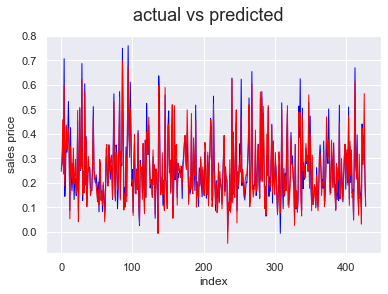

In [87]:
# Simple Linear Regression with all features: Actual vs Predicted

c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=1, linestyle="-")
fig.suptitle('actual vs predicted', fontsize=18)              # Plot heading 
plt.xlabel('index', fontsize=12)                               # X-label
plt.ylabel('sales price', fontsize=12)                         # Y-label

### Ridge Regression

In [88]:
#Applying Ridge Regression with Varying the hyperparameter 'lambda'

#X_Seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
lambdas = [0, 0.001, 0.01, 1, 10, 100]

for i in lambdas:
    degree = 2
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train_poly,y_train)
    
    #computing r2 score and model coefficients
    y_train_pred_poly = ridgereg.predict(X_train_poly)
    print("lambda_train :", i, "degree:", degree)
    print("r2_score_train: ", r2_score(y_train,y_train_pred_poly))
    print("coefficients_train: ", ridgereg.coef_)

print("\n")

for i in lambdas:
    y_test_pred_poly = ridgereg.predict(poly.fit_transform(X_test))
    print("lambda_test :", i, "degree:", degree)
    print("r2_score_test: ", r2_score(y_test,y_test_pred_poly))
    print("coefficients_test: ", ridgereg.coef_)
    if i == 10:
        y_test_pred = y_test_pred_poly
    


lambda_train : 0 degree: 2
r2_score_train:  0.9999933361581332
coefficients_train:  [ 0.          0.48950344 -0.4002518  ... -0.11970746  0.
 -0.09640892]
lambda_train : 0.001 degree: 2
r2_score_train:  0.9990929033111455
coefficients_train:  [ 0.          0.35816922 -0.149208   ... -0.06468683  0.
 -0.02427508]
lambda_train : 0.01 degree: 2
r2_score_train:  0.9956789994453756
coefficients_train:  [ 0.          0.14006064 -0.010748   ... -0.01453408  0.
  0.00887417]
lambda_train : 1 degree: 2
r2_score_train:  0.9722747639720256
coefficients_train:  [0.         0.00785725 0.00258912 ... 0.00635921 0.         0.001135  ]
lambda_train : 10 degree: 2
r2_score_train:  0.9495779988125622
coefficients_train:  [ 0.          0.00099154 -0.00080515 ...  0.00567527  0.
 -0.00065717]
lambda_train : 100 degree: 2
r2_score_train:  0.9184102386305266
coefficients_train:  [ 0.00000000e+00 -1.99339989e-03 -1.08298147e-03 ...  6.14171861e-03
  0.00000000e+00 -5.41753116e-05]


lambda_test : 0 degree: 2

In [89]:
model_parameter = list(ridgereg.coef_)
model_parameter.insert(0,ridgereg.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','coefficients']

In [90]:
# Significant variables to predict price of house using ridge regression

ridge_coef.sort_values(by = 'coefficients',ascending = False).head(10)

Features  coefficients
0     MSSubClass      0.123075
27      HalfBath      0.010828
6      YearBuilt      0.010011
24  LowQualFinSF      0.008961
18     BsmtUnfSF      0.007601
21    Electrical      0.007199
25     GrLivArea      0.006764
36    WoodDeckSF      0.006725
4    OverallQual      0.005946
7      RoofStyle      0.005114

Text(0, 0.5, 'sales price')

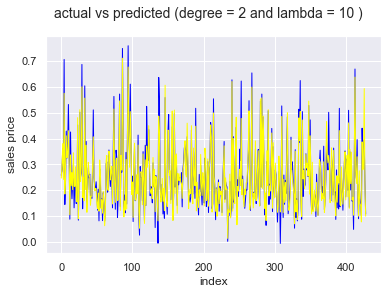

In [91]:
# Ridge Regression with all features: Actual vs Predicted 

c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1, linestyle="-")
plt.plot(c, y_test_pred , color="yellow",  linewidth=1, linestyle="-")
fig.suptitle('actual vs predicted (degree = 2 and lambda = 10 )', fontsize=14)              # Plot heading 
plt.xlabel('index', fontsize=12)                               # X-label
plt.ylabel('sales price', fontsize=12)                         # Y-label

### Lasso Regression

In [92]:
#Applying Lasso Regression with Varying the hyperparameter 'lambda'

X_Seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
lambdas = [0, 0.0001, 0.0005, 0.001]

for i in lambdas:
    degree = 2
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly,y_train)
    y_pred_poly = lassoreg.predict(X_poly)
    
    print("lambda:", i, "degree:", degree)
    print("r2_score: ", r2_score(y_train,y_pred_poly))
    print("coefficients: ", lassoreg.coef_)
    
print("\n")

for i in lambdas:
    y_test_pred_poly = ridgereg.predict(poly.fit_transform(X_test))
    print("lambda_test :", i, "degree:", degree)
    print("r2_score_test: ", r2_score(y_test,y_test_pred_poly))
    print("coefficients_test: ", ridgereg.coef_)
    if i == 0.0001:
        y_test_pred = y_test_pred_poly
    

lambda: 0 degree: 2
r2_score:  0.9973401429613966
coefficients:  [ 0.         -0.02863484 -0.14612977 ... -0.0026954   0.
  0.00629065]
lambda: 0.0001 degree: 2
r2_score:  0.9467623590570804
coefficients:  [ 0. -0. -0. ...  0.  0. -0.]
lambda: 0.0005 degree: 2
r2_score:  0.920840044751655
coefficients:  [ 0. -0. -0. ...  0.  0.  0.]
lambda: 0.001 degree: 2
r2_score:  0.9024026173914884
coefficients:  [ 0.         -0.         -0.         ...  0.00477041  0.
  0.        ]


lambda_test : 0 degree: 2
r2_score_test:  0.9107662493440333
coefficients_test:  [ 0.00000000e+00 -1.99339989e-03 -1.08298147e-03 ...  6.14171861e-03
  0.00000000e+00 -5.41753116e-05]
lambda_test : 0.0001 degree: 2
r2_score_test:  0.9107662493440333
coefficients_test:  [ 0.00000000e+00 -1.99339989e-03 -1.08298147e-03 ...  6.14171861e-03
  0.00000000e+00 -5.41753116e-05]
lambda_test : 0.0005 degree: 2
r2_score_test:  0.9107662493440333
coefficients_test:  [ 0.00000000e+00 -1.99339989e-03 -1.08298147e-03 ...  6.14171861

In [93]:
model_parameter = list(lassoreg.coef_)
model_parameter.insert(0,lassoreg.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Features','coefficients']

In [94]:
# Significant variables to predict price of house using lasso regression

lasso_coef.sort_values(by = 'coefficients',ascending = False).head(10)

Features  coefficients
0             MSSubClass      0.132490
46  Neighborhood_Gilbert      0.022268
18             BsmtUnfSF      0.020163
4            OverallQual      0.019631
55    Neighborhood_SWISU      0.016551
29          KitchenAbvGr      0.007531
58  Neighborhood_StoneBr     -0.000000
34            GarageArea     -0.000000
35            GarageQual      0.000000
36            WoodDeckSF      0.000000

Text(0, 0.5, 'sales price')

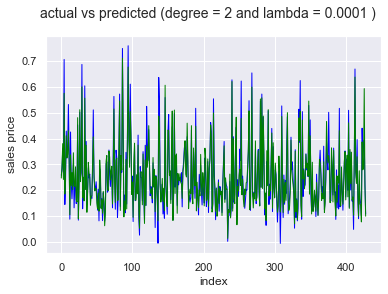

In [95]:
# Lasso Regression with all features: Actual vs Predicted 

c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1, linestyle="-")
plt.plot(c, y_test_pred , color="green",  linewidth=1, linestyle="-")
fig.suptitle('actual vs predicted (degree = 2 and lambda = 0.0001 )', fontsize=14)              # Plot heading 
plt.xlabel('index', fontsize=12)                               # X-label
plt.ylabel('sales price', fontsize=12)                         # Y-label

# Conclusion

##### For ridge regression with polynomial degree of 2 best value of lambda is 10
##### For lasso regression with polynomial degree of 2 best value of lambda is 0.0001